___

# WELCOME!

___

Welcome to the "***Sentiment Analysis and Classification***" study.

This analysis will focus on using Natural Language techniques to find broad trends in the written thoughts of the customers. 
The goal is to predict whether customers recommend the product they purchased using the information in their review text.

One of the challenges in this study is to extract useful information from the *Review Text* variable using text mining techniques. The other challenge is that we need to convert text files into numeric feature vectors to run machine learning algorithms.

We will build sentiment classification models using Machine Learning algorithms (***Logistic Regression, Naive Bayes, Support Vector Machine, Random Forest*** and ***Ada Boosting***) and **Deep Learning algorithms**.

Before diving into the project, let's take a look at the Determines and Tasks.

## Determines

The data is a collection of 22641 Rows and 10 column variables. Each row includes a written comment as well as additional customer information. 
Also each row corresponds to a customer review, and includes the variables:


**Feature Information:**

**Clothing ID:** Integer Categorical variable that refers to the specific piece being reviewed.

**Age:** Positive Integer variable of the reviewers age.

**Title:** String variable for the title of the review.

**Review Text:** String variable for the review body.

**Rating:** Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.

**Recommended IND:** Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.

**Positive Feedback Count:** Positive Integer documenting the number of other customers who found this review positive.

**Division Name:** Categorical name of the product high level division.

**Department Name:** Categorical name of the product department name.

**Class Name:** Categorical name of the product class name.

---

The basic goal in this project is to predict whether customers recommend the product they purchased using the information in their *Review Text*.
Especially, it should be noted that the expectation in this project is to use only the "Review Text" variable and neglect the other ones. 
Of course, if we want, we can work on other variables individually.

Project Structure is separated in five tasks: ***EDA, Feature Selection and Data Cleaning , Text Mining, Word Cloud*** and ***Sentiment Classification with Machine Learning***.

Classically, we can start to know the data after doing the import and load operations. 
We need to do missing value detection for Review Text, which is the only variable we need to care about. We can drop other variables.

We will need to apply ***noise removal*** and ***lexicon normalization*** processes by using the capabilities of the ***nltk*** library to the data set that is ready for text mining.

Afterwards, we will implement ***Word Cloud*** as a visual analysis of word repetition.

Finally, we will build models with five different algorithms and compare their performance. Thus, you will determine the algorithm that makes the most accurate emotion estimation by using the information obtained from the * Review Text * variable.






---
---

## Tasks

#### 1. Exploratory Data Analysis

- Import Modules, Load Discover the Data

#### 2. Feature Selection and Data Cleaning

- Feature Selection and Rename Column Name
- Missing Value Detection

#### 3. Text Mining

- Tokenization
- Noise Removal
- Lexicon Normalization

#### 4. WordCloud - Repetition of Words

- Detect Reviews
- Collect Words 
- Create Word Cloud 


#### 5. Sentiment Classification with Machine Learning

- Train - Test Split
- Vectorization
- TF-IDF
- Logistic Regression
- Naive Bayes
- Support Vector Machine
- Random Forest
- AdaBoost
- Model Comparison

---
---

# Sentiment analysis of women's clothes reviews


In this study we used sentiment analysis to determined whether the product is recommended or not. We used different machine learning algorithms to get more accurate predictions. The following classification algorithms have been used: Logistic Regression, Naive Bayes, Support Vector Machine (SVM), Random Forest and Ada Boosting. The dataset comes from Woman Clothing Review that can be find at (https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews. 


## 1. Exploratory Data Analysis

### Import Libraries, Load and Discover the Data

In [355]:
# !pip install pyforest
# 1-Import Libraies
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline
import statsmodels.api as sm
import statsmodels.formula.api as smf
import missingno as msno 

from sklearn.compose import make_column_transformer

# Scaling
from sklearn.preprocessing import scale 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PowerTransformer 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler


# Importing plotly and cufflinks in offline mode
import cufflinks as cf
import plotly.offline
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

# Figure&Display options
plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('max_colwidth',200)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 200)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# !pip install termcolor
import colorama
from colorama import Fore, Style  # maakes strings colored
from termcolor import colored

import ipywidgets
from ipywidgets import interact

import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from collections import Counter
from wordcloud import WordCloud 

### Some Useful User Defined Functions

In [356]:
## Some Useful Functions

###############################################################################

def missing_values(df):
    missing_number = df.isnull().sum().sort_values(ascending=False)
    missing_percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])
    return missing_values[missing_values['Missing_Number']>0]

###############################################################################

def first_looking(df):
    print(colored("Shape:", attrs=['bold']), df.shape,'\n', 
          colored('-'*79, 'red', attrs=['bold']),
          colored("\nInfo:\n", attrs=['bold']), sep='')
    print(df.info(), '\n', 
          colored('-'*79, 'red', attrs=['bold']), sep='')
    print(colored("Number of Uniques:\n", attrs=['bold']), df.nunique(),'\n',
          colored('-'*79, 'red', attrs=['bold']), sep='')
    print(colored("Missing Values:\n", attrs=['bold']), missing_values(df),'\n', 
          colored('-'*79, 'red', attrs=['bold']), sep='')
    print(colored("All Columns:", attrs=['bold']), list(df.columns),'\n', 
          colored('-'*79, 'red', attrs=['bold']), sep='')

    df.columns= df.columns.str.lower().str.replace('&', '_').str.replace(' ', '_')

    print(colored("Columns after rename:", attrs=['bold']), list(df.columns),'\n',
              colored('-'*79, 'red', attrs=['bold']), sep='')
    
        
def multicolinearity_control(df):
    feature =[]
    collinear=[]
    for col in df.corr().columns:
        for i in df.corr().index:
            if (abs(df.corr()[col][i])> .9 and abs(df.corr()[col][i]) < 1):
                    feature.append(col)
                    collinear.append(i)
                    print(colored(f"Multicolinearity alert in between:{col} - {i}", 
                                  "red", attrs=['bold']), df.shape,'\n',
                                  colored('-'*79, 'red', attrs=['bold']), sep='')

def duplicate_values(df):
    print(colored("Duplicate check...", attrs=['bold']), sep='')
    duplicate_values = df.duplicated(subset=None, keep='first').sum()
    if duplicate_values > 0:
        df.drop_duplicates(keep='first', inplace=True)
        print(duplicate_values, colored("Duplicates were dropped!"),'\n',
              colored('-'*79, 'red', attrs=['bold']), sep='')
    else:
        print(colored("There are no duplicates"),'\n',
              colored('-'*79, 'red', attrs=['bold']), sep='')     
        
def drop_columns(df, drop_columns):
    if drop_columns !=[]:
        df.drop(drop_columns, axis=1, inplace=True)
        print(drop_columns, 'were dropped')
    else:
        print(colored('We will now check the missing values and if necessary will drop related columns!', attrs=['bold']),'\n',
              colored('-'*79, 'red', attrs=['bold']), sep='')
        
def drop_null(df, limit):
    print('Shape:', df.shape)
    for i in df.isnull().sum().index:
        if (df.isnull().sum()[i]/df.shape[0]*100)>limit:
            print(df.isnull().sum()[i], 'percent of', i ,'null and were dropped')
            df.drop(i, axis=1, inplace=True)
            print('new shape:', df.shape)       
    print('New shape after missing value control:', df.shape)
        
###############################################################################

# To view summary information about the column

def first_look(col):
    print("column name    : ", col)
    print("--------------------------------")
    print("per_of_nulls   : ", "%", round(df[col].isnull().sum()/df.shape[0]*100, 2))
    print("num_of_nulls   : ", df[col].isnull().sum())
    print("num_of_uniques : ", df[col].nunique())
    print(df[col].value_counts(dropna = False))

In [357]:
df = pd.read_csv("Womens Clothing E-Commerce Reviews.csv")

In [358]:
df.tail()

Unnamed: 0  Clothing ID  Age  \
23481       23481         1104   34   
23482       23482          862   48   
23483       23483         1104   31   
23484       23484         1084   28   
23485       23485         1104   52   

                                                    Title  \
23481                      Great dress for many occasions   
23482                          Wish it was made of cotton   
23483                               Cute, but see through   
23484  Very cute dress, perfect for summer parties and we   
23485                     Please make more like this one!   

                                                                                                                                                                                                   Review Text  \
23481                                                                      I was very happy to snag this dress at such a great price! it's very easy to slip on and has a very flattering cut and color combo.   
23482  It reminds me of maternity clothes. soft, stretchy, shiny material. cut is flattering and drapes nicely. i only found one button to close front... looked awkward. nice long sleeves.\nnot for me bu...   
23483  This fit well, but the top was very see through. this never would have worked for me. i'm glad i was able to try it on in the store and didn't order it online. with different fabric, it would have...   
23484  I bought this dress for a wedding i have this summer, and it's so cute. unfortunately the fit isn't perfect. the medium fits my waist perfectly, but was way too long and too big in the bust and sh...   
23485                                                                                           This dress in a lovely platinum is feminine and fits perfectly, easy to wear and comfy, too! highly recommend!   

       Rating  Recommended IND  Positive Feedback Count   Division Name  \
23481       5                1                        0  General Petite   
23482       3                1                        0  General Petite   
23483       3                0                        1  General Petite   
23484       3                1                        2         General   
23485       5                1                       22  General Petite   

      Department Name Class Name  
23481         Dresses    Dresses  
23482            Tops      Knits  
23483         Dresses    Dresses  
23484         Dresses    Dresses  
23485         Dresses    Dresses

In [359]:
df.sample(5)

Unnamed: 0  Clothing ID  Age           Title  \
19201       19201         1020   43  Vibrant colors   
12913       12913         1078   39      Cute dress   
4545         4545          820   29    Soft and fun   
2119         2119          862   84  Wanted to love   
18763       18763          829   42    Very pretty!   

                                                                                                                                                                                                   Review Text  \
19201                                                            Skirt is made well and beautiful colors. runs a tad small. i am typically a 4/6 and i ordered the 8 (based on other reviews) and it fit well.   
12913                                                                                                   This is a nice flowy dress that i plan to wear in the fall with long boots. i love how light it feels.   
4545   This shirt is very soft and fits nicely. as with a lot of maeve tops, the arms are a little snug so if you have muscular arms you'll definitely want to size up. it won't make the shirt too "blouse...   
2119   I wanted to love this top. the color is wonderful in the pink and the material is silky soft. it is huge though, i am a 34 dd and bought my usual small! i am going to exchange for an xs and am hop...   
18763  I purchased this blouse in the kelly green the other day and i love it. the color is beautiful and i like how it hangs/flows- especially the sleeves. it's not warm enough to wear by itself when it...   

       Rating  Recommended IND  Positive Feedback Count   Division Name  \
19201       4                1                        0         General   
12913       5                1                        0  General Petite   
4545        5                1                        0         General   
2119        3                1                        1         General   
18763       5                1                        1  General Petite   

      Department Name Class Name  
19201         Bottoms     Skirts  
12913         Dresses    Dresses  
4545             Tops    Blouses  
2119             Tops      Knits  
18763            Tops    Blouses

### Data Wrangling

In [360]:
first_looking(df)
duplicate_values(df)
drop_columns(df,[])
drop_null(df, 90)

Shape:(23486, 11)
-------------------------------------------------------------------------------
Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB
None
------------------------------------------

In [361]:
df.columns

Index(['unnamed:_0', 'clothing_id', 'age', 'title', 'review_text', 'rating',
       'recommended_ind', 'positive_feedback_count', 'division_name',
       'department_name', 'class_name'],
      dtype='object')

- The "Unnamed:_0" column contains completely unique values and contains the same information as the index. Alsa "clothing_id" columns has unique values over 1200. I'm dropping this columns because they won't work for us as they stand.

In [362]:
df.drop(['unnamed:_0', 'clothing_id'], axis = 1, inplace=True)

In [363]:
df.shape

(23486, 9)

In [364]:
df = df.rename(columns = {'Review Text' : 'text', 'recommended_ind' : 'recommended', 
                          'positive_feedback_count' : 'feedback_count', 'division_name' : 'division', 
                          'department_name' : 'department', 'class_name' :'class'})

In [365]:
df.describe().T

count   mean    std    min    25%    50%    75%     max
age            23486.000 43.199 12.280 18.000 34.000 41.000 52.000  99.000
rating         23486.000  4.196  1.110  1.000  4.000  5.000  5.000   5.000
recommended    23486.000  0.822  0.382  0.000  1.000  1.000  1.000   1.000
feedback_count 23486.000  2.536  5.702  0.000  0.000  1.000  3.000 122.000

- Columns with ordinal information, although the "rating" and "recommended_ind" columns are encoded as numeric. 

In [366]:
df.describe(include=object).T

count unique  \
title        19676  13993   
review_text  22641  22634   
division     23472      3   
department   23472      6   
class        23472     20   

                                                                                            top  \
title                                                                                  Love it!   
review_text  Perfect fit and i've gotten so many compliments. i buy all my suits from here now!   
division                                                                                General   
department                                                                                 Tops   
class                                                                                   Dresses   

              freq  
title          136  
review_text      3  
division     13850  
department   10468  
class         6319

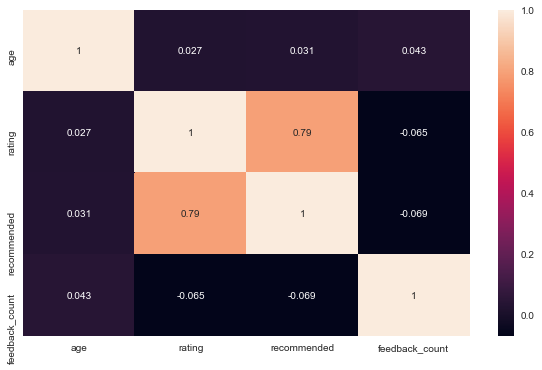

In [367]:
sns.heatmap(df.corr(), annot=True);

- Let us have look at the columns remaining in the dataset.

In [368]:
df.columns

Index(['age', 'title', 'review_text', 'rating', 'recommended',
       'feedback_count', 'division', 'department', 'class'],
      dtype='object')

***age***
- Positive Integer variable of the reviewers age.

In [369]:
first_look("age")

column name    :  age
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  77
39    1269
35     909
36     842
34     804
38     780
37     766
41     741
33     725
46     713
42     651
32     631
48     626
44     617
40     617
43     579
31     569
47     564
53     560
45     529
29     513
49     490
56     471
52     442
28     428
26     423
30     407
50     398
54     395
51     393
57     363
27     344
60     341
62     338
25     331
55     328
59     321
58     277
66     276
64     247
23     247
24     245
63     239
61     227
65     226
67     157
22     146
68     141
69     113
20     108
21     102
70      93
71      51
74      50
72      46
83      43
73      40
19      40
75      26
77      18
78      15
79      15
82      13
76      10
80      10
85       6
84       6
91       5
89       5
81       5
18       4
87       4
94       3
90       2
86       2
93       2
99       2
92       1
Name: age, dtype: int64


In [370]:
df.age.describe().T

count   23486.000
mean       43.199
std        12.280
min        18.000
25%        34.000
50%        41.000
75%        52.000
max        99.000
Name: age, dtype: float64

In [371]:
px.histogram(df, x = df.age)

<IPython.core.display.Javascript object>

In [372]:
pd.crosstab(df.age, df.recommended).iplot(kind="bar")

***rating*** 
- Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.

In [373]:
first_look("rating")

column name    :  rating
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  5
5    13131
4     5077
3     2871
2     1565
1      842
Name: rating, dtype: int64


In [374]:
df.rating.describe().T

count   23486.000
mean        4.196
std         1.110
min         1.000
25%         4.000
50%         5.000
75%         5.000
max         5.000
Name: rating, dtype: float64

In [375]:
px.histogram(df, x = df.rating)

<IPython.core.display.Javascript object>

In [376]:
pd.crosstab(df.rating, df.recommended).iplot(kind="bar")

***recommended*** 
- Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.

In [377]:
first_look("recommended")

column name    :  recommended
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  2
1    19314
0     4172
Name: recommended, dtype: int64


In [378]:
df.recommended.describe().T

count   23486.000
mean        0.822
std         0.382
min         0.000
25%         1.000
50%         1.000
75%         1.000
max         1.000
Name: recommended, dtype: float64

In [379]:
px.histogram(df, x = df.recommended)

<IPython.core.display.Javascript object>

***feedback_count:***
- Positive Integer documenting the number of other customers who found this review positive.

In [380]:
first_look("feedback_count")

column name    :  feedback_count
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  82
0      11176
1       4043
2       2193
3       1433
4        922
5        673
6        525
7        374
8        319
9        261
10       225
11       178
12       146
14       121
13       102
15        94
17        81
16        74
18        62
19        54
20        40
23        31
21        30
22        29
25        25
28        24
26        23
24        21
27        20
30        18
31        17
29        15
32        10
42         9
37         9
38         8
34         7
36         6
35         6
33         6
51         5
43         4
45         4
39         4
81         4
65         4
44         3
40         3
47         3
41         3
57         3
46         2
49         2
58         2
53         2
55         2
66         1
78         1
94         1
64         1
48         1
93         1
77         1
61         1
50         1
87         1
98         

In [381]:
df.feedback_count.describe().T

count   23486.000
mean        2.536
std         5.702
min         0.000
25%         0.000
50%         1.000
75%         3.000
max       122.000
Name: feedback_count, dtype: float64

In [382]:
px.histogram(df, x = df.feedback_count)

<IPython.core.display.Javascript object>

In [383]:
pd.crosstab(df.feedback_count, df.recommended).iplot(kind="bar")

***division*** 
- Categorical name of the product high level division.

In [384]:
first_look("division")

column name    :  division
--------------------------------
per_of_nulls   :  % 0.06
num_of_nulls   :  14
num_of_uniques :  3
General           13850
General Petite     8120
Initmates          1502
NaN                  14
Name: division, dtype: int64


In [385]:
df.division.describe().T

count       23472
unique          3
top       General
freq        13850
Name: division, dtype: object

In [386]:
px.histogram(df, x = df.division)

<IPython.core.display.Javascript object>

In [387]:
pd.crosstab(df.division, df.recommended).iplot(kind="bar")

***department***
- Categorical name of the product department name

In [388]:
first_look("department")

column name    :  department
--------------------------------
per_of_nulls   :  % 0.06
num_of_nulls   :  14
num_of_uniques :  6
Tops        10468
Dresses      6319
Bottoms      3799
Intimate     1735
Jackets      1032
Trend         119
NaN            14
Name: department, dtype: int64


In [389]:
df.department.describe().T

count     23472
unique        6
top        Tops
freq      10468
Name: department, dtype: object

In [390]:
px.histogram(df, x = df.department)

<IPython.core.display.Javascript object>

In [391]:
pd.crosstab(df.department, df.recommended).iplot(kind="bar")

***class***
- Categorical name of the product class name.

In [392]:
first_look("class")

column name    :  class
--------------------------------
per_of_nulls   :  % 0.06
num_of_nulls   :  14
num_of_uniques :  20
Dresses           6319
Knits             4843
Blouses           3097
Sweaters          1428
Pants             1388
Jeans             1147
Fine gauge        1100
Skirts             945
Jackets            704
Lounge             691
Swim               350
Outerwear          328
Shorts             317
Sleep              228
Legwear            165
Intimates          154
Layering           146
Trend              119
NaN                 14
Casual bottoms       2
Chemises             1
Name: class, dtype: int64


In [393]:
df["class"].describe().T

count       23472
unique         20
top       Dresses
freq         6319
Name: class, dtype: object

In [394]:
px.histogram(df, x = df["class"])

<IPython.core.display.Javascript object>

In [395]:
pd.crosstab(df["class"], df.recommended).iplot(kind="bar")

***title*** 
- String variable for the title of the review.

In [396]:
first_look("title")

column name    :  title
--------------------------------
per_of_nulls   :  % 16.22
num_of_nulls   :  3810
num_of_uniques :  13993
NaN                                    3810
Love it!                                136
Beautiful                                95
Love                                     88
Love!                                    84
                                       ... 
Fun floral tee                            1
Too narrow for this romper                1
Very cute until washed!                   1
Lovely fabric but not pretty design       1
Cute details and good cut                 1
Name: title, Length: 13994, dtype: int64


In [397]:
df.title.describe().T

count        19676
unique       13993
top       Love it!
freq           136
Name: title, dtype: object

***review_text*** 
- String variable for the review body.

In [398]:
first_look("review_text")

column name    :  review_text
--------------------------------
per_of_nulls   :  % 3.6
num_of_nulls   :  845
num_of_uniques :  22634
NaN                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       845
Perfect fit and i've gotten so many compliments. i buy all my suits from here now!                                                                                                                                                                                                                                                                                   

In [399]:
df.review_text.describe().T

count                                                                                  22641
unique                                                                                 22634
top       Perfect fit and i've gotten so many compliments. i buy all my suits from here now!
freq                                                                                       3
Name: review_text, dtype: object

#### Check Proportion of Target Class Variable:

In [400]:
df.columns

Index(['age', 'title', 'review_text', 'rating', 'recommended',
       'feedback_count', 'division', 'department', 'class'],
      dtype='object')

The target class variable is imbalanced, where "Recommended" values are more dominating then "Not Recommended".

1    19314
0     4172
Name: recommended, dtype: int64


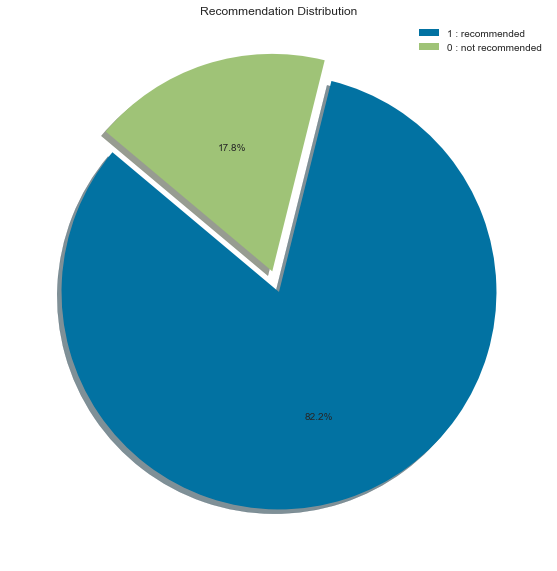

In [401]:
# recommended : 
# Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.

print(df.recommended.value_counts())

plt.figure(figsize=(10,10))

explode = [0,0.1]
plt.pie(df.recommended.value_counts(), explode=explode,autopct='%1.1f%%', shadow=True,startangle=140)
plt.legend(labels=['1 : recommended','0 : not recommended'])
plt.title('Recommendation Distribution')
plt.axis('off');

## 2. Feature Selection and Data Cleaning

From now on, the DataFrame we will work with should contain two columns: **"Review Text"** and **"Recommended IND"**. We can do the missing value detection operations from now on. We can also rename the column names if we want.

### Feature Selection and Rename Column Name

In [402]:
df.columns

Index(['age', 'title', 'review_text', 'rating', 'recommended',
       'feedback_count', 'division', 'department', 'class'],
      dtype='object')

In [403]:
df_ml = df.copy()

# df_ml = df[['review_text', 'recommended']].copy()

In [404]:
drop_columns = ['age', 
                'title', 
                'rating',
                'feedback_count', 
                'division',
                'department',
                'class']

In [405]:
df_ml.drop(drop_columns, axis = 1, inplace = True)

In [406]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   review_text  22641 non-null  object
 1   recommended  23486 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 367.1+ KB


In [407]:
df_ml.rename(columns = {'review_text':'text', 'recommended':'recommend'}, inplace = True)

In [408]:
df_ml.columns

Index(['text', 'recommend'], dtype='object')

---
---


### Missing Value Detection

In [409]:
missing_values(df_ml)

Missing_Number  Missing_Percent
text             845            0.036

In [410]:
df_ml.isnull().melt(value_name="missing")

variable  missing
0           text    False
1           text    False
2           text    False
3           text    False
4           text    False
...          ...      ...
46967  recommend    False
46968  recommend    False
46969  recommend    False
46970  recommend    False
46971  recommend    False

[46972 rows x 2 columns]

<Figure size 720x360 with 0 Axes>

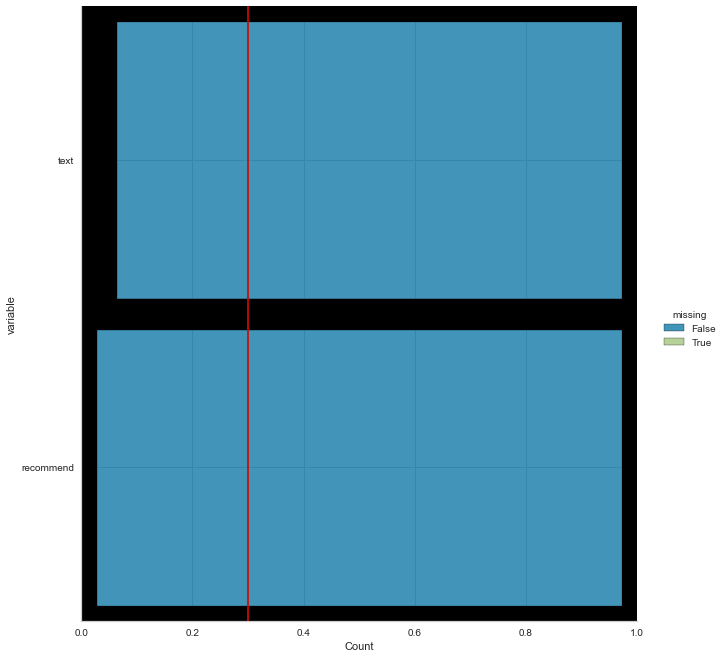

In [411]:
plt.figure(figsize = (10, 5))

sns.displot(
    data = df_ml.isnull().melt(value_name = "missing"),
    y = "variable",
    hue = "missing",
    multiple = "fill",
    height = 9.25)

plt.axvline(0.3, color = "r");

In [412]:
df_ml = df_ml.dropna()

# df_ml = df_ml.dropna(subset=['text'], axis=0)
# df_ml = df_ml.reset_index(drop=True)

In [413]:
missing_values(df_ml)

Empty DataFrame
Columns: [Missing_Number, Missing_Percent]
Index: []

In [414]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22641 entries, 0 to 23485
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       22641 non-null  object
 1   recommend  22641 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 530.6+ KB


In [415]:
df_ml["text"].str.isspace().sum()
df_ml[df_ml["text"].str.isspace() == True].index

Int64Index([], dtype='int64')

---
---


## 3. Text Mining

Text is the most unstructured form of all the available data, therefore various types of noise are present in it. This means that the data is not readily analyzable without any pre-processing. The entire process of cleaning and standardization of text, making it noise-free and ready for analysis is known as **text preprocessing**.

The three key steps of text preprocessing:

- **Tokenization:**
This step is one of the top priorities when it comes to working on text mining. Tokenization is essentially splitting a phrase, sentence, paragraph, or an entire text document into smaller units, such as individual words or terms. Each of these smaller units are called tokens.


- **Noise Removal:**
Any piece of text which is not relevant to the context of the data and the end-output can be specified as the noise.
For example – language stopwords (commonly used words of a language – is, am, the, of, in etc), URLs or links, upper and lower case differentiation, punctuations and industry specific words. This step deals with removal of all types of noisy entities present in the text.


- **Lexicon Normalization:**
Another type of textual noise is about the multiple representations exhibited by single word.
For example – “play”, “player”, “played”, “plays” and “playing” are the different variations of the word – “play”. Though they mean different things, contextually they all are similar. This step converts all the disparities of a word into their normalized form (also known as lemma). 
There are two methods of lexicon normalisation; **[Stemming or Lemmatization](https://www.guru99.com/stemming-lemmatization-python-nltk.html)**. Lemmatization is recommended for this case, because Lemmatization as this will return the root form of each word (rather than just stripping suffixes, which is stemming).

As the first step change text to tokens and convertion all of the words to lower case.  Next remove punctuation, bad characters, numbers and stop words. The second step is aimed to normalization them throught the Lemmatization method. 

### Tokenization, Noise Removal, Lexicon Normalization

In [416]:
df_ml.head()

text  \
0                                                                                                                                                    Absolutely wonderful - silky and sexy and comfortable   
1  Love this dress!  it's sooo pretty.  i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite.  i bought a petite and am 5'8".  i love the length...   
2  I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i co...   
3                                                                             I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!   
4         This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!   

   recommend  
0          1  
1          1  
2          0  
3          1  
4          1

In [417]:
stop_words = stopwords.words('english')

In [418]:
def cleaning(data):
    
    #1. Tokenize
    text_tokens = word_tokenize(data.replace("'", "").lower()) 
        
    #2. Remove Puncs
    tokens_without_punc = [w for w in text_tokens if w.isalpha()]  
    
    #3. Removing Stopwords
    tokens_without_sw = [t for t in tokens_without_punc if t not in stop_words]
    
    #4. lemma
    text_cleaned = [WordNetLemmatizer().lemmatize(t) for t in tokens_without_sw]
        
    #joining
    return " ".join(text_cleaned)

In [419]:
df_ml["text"] = df_ml["text"].apply(cleaning)
df_ml["text"].head()

0                                                                                                                                                                absolutely wonderful silky sexy comfortable
1                       love dress sooo pretty happened find store im glad bc never would ordered online bc petite bought petite love length hit little knee would definitely true midi someone truly petite
2    high hope dress really wanted work initially ordered petite small usual size found outrageously small small fact could zip reordered petite medium overall top half comfortable fit nicely bottom ha...
3                                                                                                                   love love love jumpsuit fun flirty fabulous every time wear get nothing great compliment
4                                                                                             shirt flattering due adjustable front tie perfect length wear legging sleeveless pair 

### Rare Words

In [420]:
" ".join(df_ml["text"]).split()

['absolutely',
 'wonderful',
 'silky',
 'sexy',
 'comfortable',
 'love',
 'dress',
 'sooo',
 'pretty',
 'happened',
 'find',
 'store',
 'im',
 'glad',
 'bc',
 'never',
 'would',
 'ordered',
 'online',
 'bc',
 'petite',
 'bought',
 'petite',
 'love',
 'length',
 'hit',
 'little',
 'knee',
 'would',
 'definitely',
 'true',
 'midi',
 'someone',
 'truly',
 'petite',
 'high',
 'hope',
 'dress',
 'really',
 'wanted',
 'work',
 'initially',
 'ordered',
 'petite',
 'small',
 'usual',
 'size',
 'found',
 'outrageously',
 'small',
 'small',
 'fact',
 'could',
 'zip',
 'reordered',
 'petite',
 'medium',
 'overall',
 'top',
 'half',
 'comfortable',
 'fit',
 'nicely',
 'bottom',
 'half',
 'tight',
 'layer',
 'several',
 'somewhat',
 'cheap',
 'net',
 'layer',
 'imo',
 'major',
 'design',
 'flaw',
 'net',
 'layer',
 'sewn',
 'directly',
 'zipper',
 'c',
 'love',
 'love',
 'love',
 'jumpsuit',
 'fun',
 'flirty',
 'fabulous',
 'every',
 'time',
 'wear',
 'get',
 'nothing',
 'great',
 'compliment',
 's

In [421]:
rare_words = pd.Series(" ".join(df_ml["text"]).split()).value_counts()
rare_words

dress          11352
fit            10128
size            9363
love            8992
top             8281
               ...  
unravelling        1
elated             1
romier             1
bacon              1
overcoming         1
Length: 11996, dtype: int64

In [422]:
rare_words = rare_words[rare_words <= 2] 

In [423]:
rare_words.index

Index(['gravity', 'panama', 'weightier', 'topic', 'shld', 'yup', 'sens',
       'looove', 'insisted', 'usu',
       ...
       'fitt', 'peacoat', 'revieved', 'hassel', 'devery', 'unravelling',
       'elated', 'romier', 'bacon', 'overcoming'],
      dtype='object', length=6497)

In [424]:
df_ml["text"] = df_ml["text"].apply(lambda x: " ".join([i for i in x.split() if i not in rare_words.index]))
df_ml["text"].head()

0                                                                                                                                                                absolutely wonderful silky sexy comfortable
1                       love dress sooo pretty happened find store im glad bc never would ordered online bc petite bought petite love length hit little knee would definitely true midi someone truly petite
2    high hope dress really wanted work initially ordered petite small usual size found small small fact could zip reordered petite medium overall top half comfortable fit nicely bottom half tight laye...
3                                                                                                                   love love love jumpsuit fun flirty fabulous every time wear get nothing great compliment
4                                                                                             shirt flattering due adjustable front tie perfect length wear legging sleeveless pair 

## 4. WordCloud - Repetition of Words

Now we'll create a Word Clouds for reviews, representing most common words in each target class.

Word Cloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance. Significant textual data points can be highlighted using a word cloud.

We will create separate word clouds for positive and negative reviews. We can qualify a review as positive or negative, by looking at its recommended status.

We can follow the steps below:

- Detect Reviews
- Collect Words 
- Create Word Cloud 


### Detect Reviews (positive and negative separately)

In [425]:
df_ml[df_ml["recommend"] == 0].head(3)

text  \
2   high hope dress really wanted work initially ordered petite small usual size found small small fact could zip reordered petite medium overall top half comfortable fit nicely bottom half tight laye...   
5   love tracy reese dress one petite foot tall usually wear brand dress pretty package lot dress skirt long full overwhelmed small frame stranger alteration shortening skirt would take away embellish...   
10       dress run small esp zipper area run ordered sp typically fit tight material top look feel cheap even pulling cause rip fabric pretty disappointed going christmas dress year needle say going back   

    recommend  
2           0  
5           0  
10          0

In [426]:
df_ml[df_ml["recommend"] == 1].head(3)

text  \
0                                                                                                                                           absolutely wonderful silky sexy comfortable   
1  love dress sooo pretty happened find store im glad bc never would ordered online bc petite bought petite love length hit little knee would definitely true midi someone truly petite   
3                                                                                              love love love jumpsuit fun flirty fabulous every time wear get nothing great compliment   

   recommend  
0          1  
1          1  
3          1

### Collect Words (positive and negative separately)

In [427]:
" ".join(df_ml["text"]).split()

['absolutely',
 'wonderful',
 'silky',
 'sexy',
 'comfortable',
 'love',
 'dress',
 'sooo',
 'pretty',
 'happened',
 'find',
 'store',
 'im',
 'glad',
 'bc',
 'never',
 'would',
 'ordered',
 'online',
 'bc',
 'petite',
 'bought',
 'petite',
 'love',
 'length',
 'hit',
 'little',
 'knee',
 'would',
 'definitely',
 'true',
 'midi',
 'someone',
 'truly',
 'petite',
 'high',
 'hope',
 'dress',
 'really',
 'wanted',
 'work',
 'initially',
 'ordered',
 'petite',
 'small',
 'usual',
 'size',
 'found',
 'small',
 'small',
 'fact',
 'could',
 'zip',
 'reordered',
 'petite',
 'medium',
 'overall',
 'top',
 'half',
 'comfortable',
 'fit',
 'nicely',
 'bottom',
 'half',
 'tight',
 'layer',
 'several',
 'somewhat',
 'cheap',
 'net',
 'layer',
 'imo',
 'major',
 'design',
 'flaw',
 'net',
 'layer',
 'sewn',
 'directly',
 'zipper',
 'c',
 'love',
 'love',
 'love',
 'jumpsuit',
 'fun',
 'flirty',
 'fabulous',
 'every',
 'time',
 'wear',
 'get',
 'nothing',
 'great',
 'compliment',
 'shirt',
 'flatteri

In [428]:
positive_words =" ".join(df_ml[df_ml["recommend"] == 1].text).split()
positive_words

['absolutely',
 'wonderful',
 'silky',
 'sexy',
 'comfortable',
 'love',
 'dress',
 'sooo',
 'pretty',
 'happened',
 'find',
 'store',
 'im',
 'glad',
 'bc',
 'never',
 'would',
 'ordered',
 'online',
 'bc',
 'petite',
 'bought',
 'petite',
 'love',
 'length',
 'hit',
 'little',
 'knee',
 'would',
 'definitely',
 'true',
 'midi',
 'someone',
 'truly',
 'petite',
 'love',
 'love',
 'love',
 'jumpsuit',
 'fun',
 'flirty',
 'fabulous',
 'every',
 'time',
 'wear',
 'get',
 'nothing',
 'great',
 'compliment',
 'shirt',
 'flattering',
 'due',
 'adjustable',
 'front',
 'tie',
 'perfect',
 'length',
 'wear',
 'legging',
 'sleeveless',
 'pair',
 'well',
 'cardigan',
 'love',
 'shirt',
 'basket',
 'hte',
 'last',
 'see',
 'would',
 'look',
 'like',
 'person',
 'store',
 'pick',
 'went',
 'teh',
 'color',
 'pale',
 'hte',
 'color',
 'really',
 'gorgeous',
 'turn',
 'trying',
 'little',
 'baggy',
 'hte',
 'x',
 'hte',
 'size',
 'bummer',
 'petite',
 'decided',
 'though',
 'said',
 'everything',
 '

In [429]:
negative_words = " ".join(df_ml[df_ml["recommend"] == 0].text).split()
negative_words 

['high',
 'hope',
 'dress',
 'really',
 'wanted',
 'work',
 'initially',
 'ordered',
 'petite',
 'small',
 'usual',
 'size',
 'found',
 'small',
 'small',
 'fact',
 'could',
 'zip',
 'reordered',
 'petite',
 'medium',
 'overall',
 'top',
 'half',
 'comfortable',
 'fit',
 'nicely',
 'bottom',
 'half',
 'tight',
 'layer',
 'several',
 'somewhat',
 'cheap',
 'net',
 'layer',
 'imo',
 'major',
 'design',
 'flaw',
 'net',
 'layer',
 'sewn',
 'directly',
 'zipper',
 'c',
 'love',
 'tracy',
 'reese',
 'dress',
 'one',
 'petite',
 'foot',
 'tall',
 'usually',
 'wear',
 'brand',
 'dress',
 'pretty',
 'package',
 'lot',
 'dress',
 'skirt',
 'long',
 'full',
 'overwhelmed',
 'small',
 'frame',
 'stranger',
 'alteration',
 'shortening',
 'skirt',
 'would',
 'take',
 'away',
 'embellishment',
 'garment',
 'love',
 'color',
 'idea',
 'style',
 'work',
 'returned',
 'dress',
 'dress',
 'run',
 'small',
 'esp',
 'zipper',
 'area',
 'run',
 'ordered',
 'sp',
 'typically',
 'fit',
 'tight',
 'material',

In [430]:
len(positive_words)

516816

In [431]:
len(negative_words)

116488

### Create Word Cloud (for most common words in recommended not recommended reviews separately)

In [432]:
review_text = df_ml["text"]

In [433]:
all_words = " ".join(review_text)

In [434]:
all_words[:100]

'absolutely wonderful silky sexy comfortable love dress sooo pretty happened find store im glad bc ne'

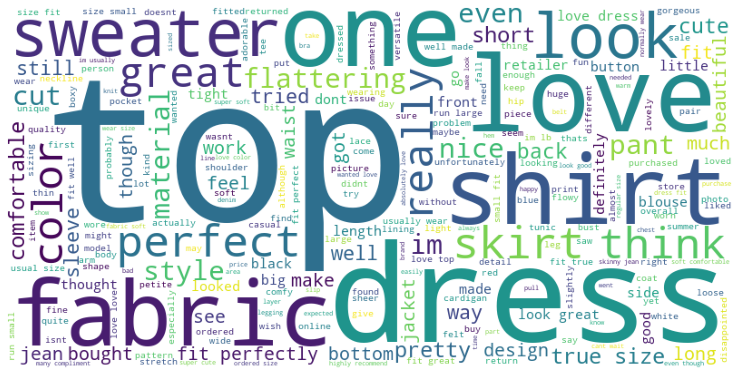

In [435]:
wordcloud = WordCloud(width = 800, height = 400, background_color = "white", max_words = 250).generate(all_words)

plt.figure(figsize = (13, 13))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

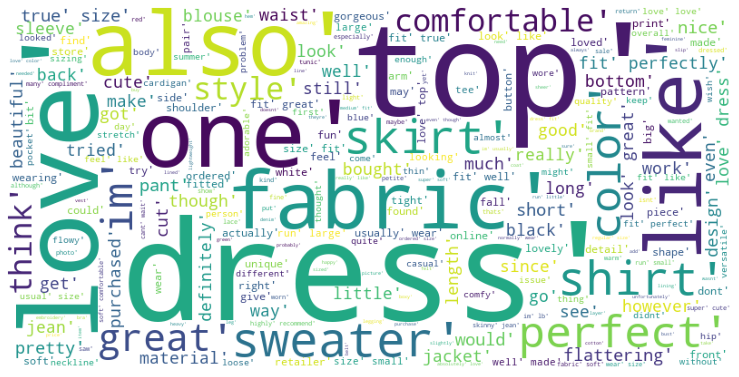

In [436]:
wordcloud = WordCloud(width = 800, height = 400, background_color = "white", max_words = 250).generate(str(positive_words))

plt.figure(figsize = (13, 13))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

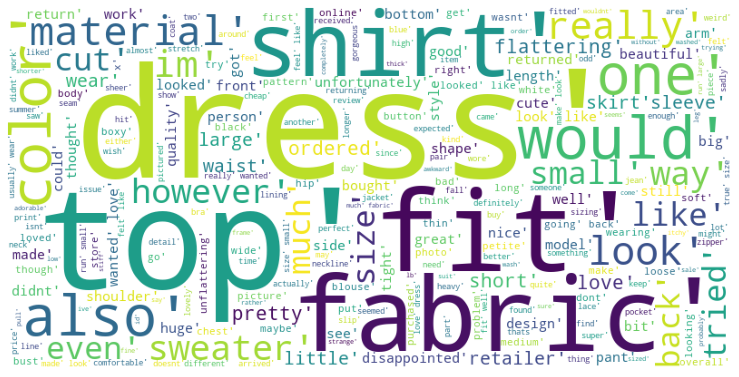

In [437]:
wordcloud = WordCloud(width = 800, height = 400, background_color = "white", max_words = 250).generate(str(negative_words))

plt.figure(figsize = (13, 13))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

### Counting words

In [438]:
counter_all = Counter(word_tokenize(all_words))
counter_all.most_common(50)

[('dress', 11352),
 ('fit', 10128),
 ('size', 9363),
 ('love', 8992),
 ('top', 8281),
 ('like', 7036),
 ('color', 6916),
 ('look', 6891),
 ('wear', 6521),
 ('great', 6101),
 ('im', 5968),
 ('would', 5014),
 ('fabric', 4862),
 ('small', 4589),
 ('really', 3924),
 ('ordered', 3835),
 ('little', 3773),
 ('perfect', 3760),
 ('one', 3704),
 ('flattering', 3485),
 ('soft', 3322),
 ('well', 3251),
 ('back', 3186),
 ('comfortable', 3047),
 ('cute', 3030),
 ('nice', 3017),
 ('bought', 2986),
 ('beautiful', 2950),
 ('bit', 2877),
 ('material', 2811),
 ('shirt', 2791),
 ('large', 2791),
 ('much', 2703),
 ('sweater', 2700),
 ('length', 2638),
 ('run', 2631),
 ('jean', 2600),
 ('also', 2583),
 ('work', 2527),
 ('petite', 2430),
 ('got', 2426),
 ('long', 2400),
 ('short', 2361),
 ('waist', 2306),
 ('quality', 2259),
 ('medium', 2233),
 ('skirt', 2220),
 ('think', 2194),
 ('pretty', 2188),
 ('even', 2166)]

## 5. Sentiment Classification with Machine Learning and Deep Learning

Before moving on to modeling, as data preprocessing steps we will need to perform **[vectorization](https://machinelearningmastery.com/prepare-text-data-machine-learning-scikit-learn/)** and **train-test split**. 

Machine learning algorithms most often take numeric feature vectors as input. Thus, when working with text documents, we need a way to convert each document into a numeric vector. This process is known as text vectorization. Commonly used vectorization approach that we will use here is to represent each text as a vector of word counts.

At this moment, we have our review text column as a token (which has no punctuations and stopwords). We can use Scikit-learn’s CountVectorizer to convert the text collection into a matrix of token counts. We can imagine this resulting matrix as a 2-D matrix, where each row is a unique word, and each column is a review.

After performing data preprocessing, we will build our models using following classification algorithms:

- Logistic Regression,
- Naive Bayes,
- Support Vector Machine,
- Random Forest,
- Ada Boosting
- Deep Learning Model.

### Train - Test Split

To run machine learning algorithms we need to convert text files into numerical feature vectors. We will use bag of words model for our analysis.

First we spliting the data into train and test sets:

In [933]:
X = df_ml["text"].values
y = df_ml["recommend"].map({0:1, 1:0}).values

In [934]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 101)

In the next step we create a numerical feature vector for each document:

### Count Vectorization

In [936]:
from sklearn.feature_extraction.text import CountVectorizer

In [937]:
vectorizer = CountVectorizer()

X_train_count = vectorizer.fit_transform(X_train)
X_test_count = vectorizer.transform(X_test)

In [938]:
X_train_count

<18112x5468 sparse matrix of type '<class 'numpy.int64'>'
	with 459355 stored elements in Compressed Sparse Row format>

In [939]:
X_test_count

<4529x5468 sparse matrix of type '<class 'numpy.int64'>'
	with 114130 stored elements in Compressed Sparse Row format>

In [940]:
len(X_train_count.toarray())

18112

In [941]:
X_train_count.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [942]:
len(X_test_count.toarray())

4529

In [943]:
X_test_count.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [944]:
pd.DataFrame(X_train_count.toarray(), columns = vectorizer.get_feature_names())

aa  ab  abby  abdomen  ability  able  abo  absolute  absolutely  \
0       0   0     0        0        0     0    0         0           0   
1       0   0     0        0        0     0    0         0           0   
2       0   0     0        0        0     0    0         0           0   
3       0   0     0        0        0     0    0         0           1   
4       0   0     0        0        0     0    0         0           0   
...    ..  ..   ...      ...      ...   ...  ...       ...         ...   
18107   0   0     0        0        0     0    0         0           0   
18108   0   0     0        0        0     0    0         0           0   
18109   0   0     0        0        0     0    0         0           0   
18110   0   0     0        0        0     0    0         0           1   
18111   0   0     0        0        0     0    0         0           0   

       absolutley  abstract  absurd  abt  abundance  ac  accent  accented  \
0               0         0       0    0          0   0       0         0   
1               0         0       0    0          0   0       0         0   
2               0         0       0    0          0   0       0         0   
3               0         0       0    0          0   0       0         0   
4               0         0       0    0          0   0       0         0   
...           ...       ...     ...  ...        ...  ..     ...       ...   
18107           0         0       0    0          0   0       0         0   
18108           0         0       0    0          0   0       0         0   
18109           0         0       0    0          0   0       0         0   
18110           0         0       0    0          0   0       0         0   
18111           0         0       0    0          0   0       0         0   

       accentuate  accentuated  accentuates  accentuating  accept  acceptable  \
0               0            0            0             0       0           0   
1               0            0            0             0       0           0   
2               0            0            0             0       0           0   
3               0            0            0             0       0           0   
4               0            0            0             0       0           0   
...           ...          ...          ...           ...     ...         ...   
18107           0            0            0             0       0           0   
18108           0            0            0             0       0           0   
18109           0            0            0             0       0           0   
18110           0            0            0             0       0           0   
18111           0            0            0             0       0           0   

       access  accessorize  accessorized  accessorizing  accessory  accident  \
0           0            0             0              0          0         0   
1           0            0             0              0          0         0   
2           0            0             0              0          0         0   
3           0            0             0              0          0         0   
4           0            0             0              0          0         0   
...       ...          ...           ...            ...        ...       ...   
18107       0            0             0              0          0         0   
18108       0            0             0              0          0         0   
18109       0            0             0              0          0         0   
18110       0            0             0              0          0         0   
18111       0            0             0              0          0         0   

       accidental  accidentally  accommodate  accommodates  accommodating  \
0               0             0            0             0              0   
1               0             0            0             0              0   
2               0           

In [945]:
X_train

array(['love gorgeous shade unflattering skintone make look version tied dress holding horse come fantastic fit flattering tummy rib cage size generous curve give regular',
       'found store last weekend thought perfect got size small plenty space usually small long found knee length zoom see detail work along front edge complement pretty back pocket btw worn everything summer let hope blend wash ok',
       'negative thing say color person different much coral pink pink fine tad unexpected ordered size fit perfectly chest laser cut out yoke add nice feminine unique touch otherwise basic top cant wait wear',
       ...,
       'wanted love skirt good quality front loose flap exposing return',
       'absolutely love top soft comfortable perfectly flowy definitely favorite go casual summer top',
       'purchased blue version store nice royal blue navy although could worn navy thought fit flattering middle piece pleat le obvious blue purple tie neck untied still low cut'],
      dtype

### TF-IDF

In [946]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [947]:
tf_idf_vectorizer = TfidfVectorizer()

X_train_tf_idf = tf_idf_vectorizer.fit_transform(X_train)
X_test_tf_idf = tf_idf_vectorizer.transform(X_test)

In [948]:
X_train_tf_idf.toarray()

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.29292217],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [949]:
pd.DataFrame(X_train_tf_idf.toarray(), columns = tf_idf_vectorizer.get_feature_names())

aa    ab  abby  abdomen  ability  able   abo  absolute  absolutely  \
0     0.000 0.000 0.000    0.000    0.000 0.000 0.000     0.000       0.000   
1     0.000 0.000 0.000    0.000    0.000 0.000 0.000     0.000       0.000   
2     0.000 0.000 0.000    0.000    0.000 0.000 0.000     0.000       0.000   
3     0.000 0.000 0.000    0.000    0.000 0.000 0.000     0.000       0.154   
4     0.000 0.000 0.000    0.000    0.000 0.000 0.000     0.000       0.000   
...     ...   ...   ...      ...      ...   ...   ...       ...         ...   
18107 0.000 0.000 0.000    0.000    0.000 0.000 0.000     0.000       0.000   
18108 0.000 0.000 0.000    0.000    0.000 0.000 0.000     0.000       0.000   
18109 0.000 0.000 0.000    0.000    0.000 0.000 0.000     0.000       0.000   
18110 0.000 0.000 0.000    0.000    0.000 0.000 0.000     0.000       0.324   
18111 0.000 0.000 0.000    0.000    0.000 0.000 0.000     0.000       0.000   

       absolutley  abstract  absurd   abt  abundance    ac  accent  accented  \
0           0.000     0.000   0.000 0.000      0.000 0.000   0.000     0.000   
1           0.000     0.000   0.000 0.000      0.000 0.000   0.000     0.000   
2           0.000     0.000   0.000 0.000      0.000 0.000   0.000     0.000   
3           0.000     0.000   0.000 0.000      0.000 0.000   0.000     0.000   
4           0.000     0.000   0.000 0.000      0.000 0.000   0.000     0.000   
...           ...       ...     ...   ...        ...   ...     ...       ...   
18107       0.000     0.000   0.000 0.000      0.000 0.000   0.000     0.000   
18108       0.000     0.000   0.000 0.000      0.000 0.000   0.000     0.000   
18109       0.000     0.000   0.000 0.000      0.000 0.000   0.000     0.000   
18110       0.000     0.000   0.000 0.000      0.000 0.000   0.000     0.000   
18111       0.000     0.000   0.000 0.000      0.000 0.000   0.000     0.000   

       accentuate  accentuated  accentuates  accentuating  accept  acceptable  \
0           0.000        0.000        0.000         0.000   0.000       0.000   
1           0.000        0.000        0.000         0.000   0.000       0.000   
2           0.000        0.000        0.000         0.000   0.000       0.000   
3           0.000        0.000        0.000         0.000   0.000       0.000   
4           0.000        0.000        0.000         0.000   0.000       0.000   
...           ...          ...          ...           ...     ...         ...   
18107       0.000        0.000        0.000         0.000   0.000       0.000   
18108       0.000        0.000        0.000         0.000   0.000       0.000   
18109       0.000        0.000        0.000         0.000   0.000       0.000   
18110       0.000        0.000        0.000         0.000   0.000       0.000   
18111       0.000        0.000        0.000         0.000   0.000       0.000   

       access  accessorize  accessorized  accessorizing  accessory  accident  \
0       0.000        0.000         0.000          0.000      0.000     0.000   
1       0.000        0.000         0.000          0.000      0.000     0.000   
2       0.000        0.000         0.000          0.000      0.000     0.000   
3       0.000        0.000         0.000          0.000      0.000     0.000   
4       0.000        0.000         0.000          0.000      0.000     0.000   
...       ...          ...           ...            ...        ...       ...   
18107   0.000        0.000         0.000          0.000      0.000     0.000   
18108   0.000        0.000         0.000          0.000      0.000     0.000   
18109   0.000        0.000         0.000          0.000      0.000     0.000   
18110   0.000        0.000         0.000          0.000      0.000     0.000   
18111   0.000        0.000         0.000          0.000      0.000     0.000   

       accidental  accidentally  accommodate  accommodates  accommodating  \
0           0.000         0.000        0.000         0.000          0.000   
1          

## Modelling with Machine Learning Models

In [950]:
from sklearn.metrics import plot_confusion_matrix, confusion_matrix, classification_report, accuracy_score, f1_score, recall_score, precision_score, average_precision_score

In [951]:
def eval(model, X_train, X_test):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    
    print(confusion_matrix(y_test, y_pred))
    print("Test_Set")
    print(classification_report(y_test,y_pred))
    print("Train_Set")
    print(classification_report(y_train,y_pred_train))
    plot_confusion_matrix(model, X_test, y_test, cmap="plasma")

## Logistic Regression

### CountVectorizer 

In [952]:
from sklearn.linear_model import LogisticRegression

logreg_count = LogisticRegression(C = 0.1, max_iter = 1000, class_weight = 'balanced', random_state = 101)
logreg_count.fit(X_train_count,y_train)

LogisticRegression(C=0.1, class_weight='balanced', max_iter=1000,
                   random_state=101)

LogReg_Count Model
------------------
[[3207  502]
 [ 120  700]]
Test_Set
              precision    recall  f1-score   support

           0       0.96      0.86      0.91      3709
           1       0.58      0.85      0.69       820

    accuracy                           0.86      4529
   macro avg       0.77      0.86      0.80      4529
weighted avg       0.89      0.86      0.87      4529

Train_Set
              precision    recall  f1-score   support

           0       0.98      0.89      0.93     14831
           1       0.65      0.92      0.76      3281

    accuracy                           0.89     18112
   macro avg       0.81      0.91      0.85     18112
weighted avg       0.92      0.89      0.90     18112



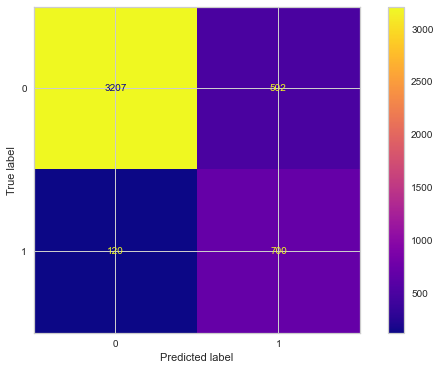

In [953]:
print("LogReg_Count Model")
print ("------------------")
eval(logreg_count, X_train_count, X_test_count)

In [954]:
import random
import pylab as pl
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

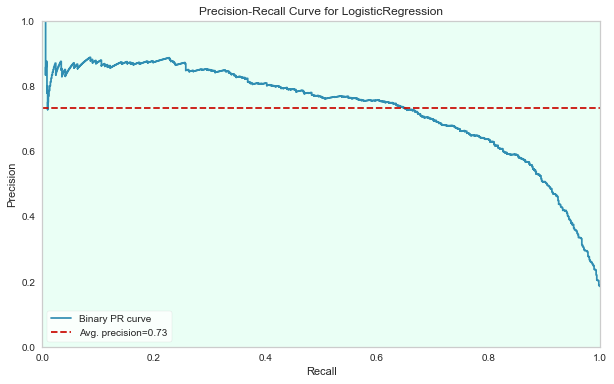

In [955]:
from yellowbrick.classifier import PrecisionRecallCurve

viz = PrecisionRecallCurve(
      LogisticRegression(C = 0.1, max_iter = 1000, class_weight= "balanced", random_state=101),
      classes = logreg_count.classes_,
      per_class = True,
      cmap = "Set1")

fig, ax = plt.subplots(figsize = (10, 6))
ax.set_facecolor('#eafff5')

viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [956]:
y_pred = logreg_count.predict(X_test_count)
log_count_rec = recall_score(y_test, y_pred, pos_label = 0, average = None)
log_count_f1 = f1_score(y_test, y_pred, pos_label = 0, average = None)
log_AP = viz.score_

In [957]:
print("viz.score_       : ", viz.score_)
print("LogReg_Count_rec : ", log_count_rec)
print("LogReg_Count_f1  : ", log_count_f1)
print("LogReg_Count_AP  : ", log_AP)

viz.score_       :  0.7317969663551334
LogReg_Count_rec :  [0.86465355 0.85365854]
LogReg_Count_f1  :  [0.9115975  0.69238378]
LogReg_Count_AP  :  0.7317969663551334


### CountVectorizer  ***Cross Validation***

In [958]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score

custom_scorer = {'accuracy': make_scorer(accuracy_score),
                 'precision-0': make_scorer(precision_score, pos_label = 0),
                 'recall-0': make_scorer(recall_score, pos_label = 0),
                 'f1-0': make_scorer(f1_score, pos_label = 0),
                 'precision-1': make_scorer(precision_score, pos_label = 1),
                 'recall-1': make_scorer(recall_score, pos_label = 1),
                 'f1-1': make_scorer(f1_score, pos_label = 1)
                 }

for i, j in custom_scorer.items():
    model = LogisticRegression(C = 0.1, max_iter = 1000, class_weight = "balanced", random_state = 101)
    scores = cross_val_score(model, X_train_count, y_train, cv = 10, scoring = j).mean()
    if i == "recall-0":
        log_count_rec = scores
    elif i == "f1-0":
        log_count_f1 = scores
    print(f" {i:20} score for LogReg_Count : {scores}\n")

 accuracy             score for LogReg_Count : 0.8632405230240023

 precision-0          score for LogReg_Count : 0.9574282121047373

 recall-0             score for LogReg_Count : 0.8717551840899466

 f1-0                 score for LogReg_Count : 0.9125722417419956

 precision-1          score for LogReg_Count : 0.587452385359375

 recall-1             score for LogReg_Count : 0.8247535028541775

 f1-1                 score for LogReg_Count : 0.6860801419633962



In [959]:
import random
import pylab as pl
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

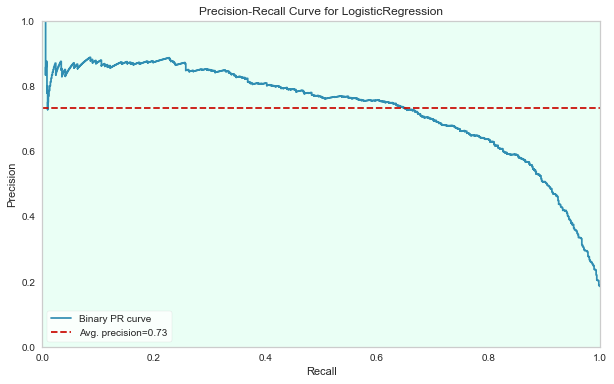

In [960]:
from yellowbrick.classifier import PrecisionRecallCurve
viz = PrecisionRecallCurve(
    LogisticRegression(C = 0.1, max_iter = 1000, class_weight = "balanced", random_state = 101),
    classes = logreg_count.classes_,
    per_class = True,
    cmap = "Set1")

fig, ax = plt.subplots(figsize = (10, 6))
ax.set_facecolor('#eafff5')

viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [961]:
LogReg_Count_AP = viz.score_
LogReg_Count_AP

0.7317969663551334

### TF-IDF 

In [962]:
logreg_tfidf = LogisticRegression(C = 1, max_iter = 1000, class_weight = "balanced", random_state = 101)
logreg_tfidf.fit(X_train_tf_idf,y_train)

LogisticRegression(C=1, class_weight='balanced', max_iter=1000,
                   random_state=101)

LogReg_TFIDF Model
------------------
[[3194  515]
 [ 110  710]]
Test_Set
              precision    recall  f1-score   support

           0       0.97      0.86      0.91      3709
           1       0.58      0.87      0.69       820

    accuracy                           0.86      4529
   macro avg       0.77      0.86      0.80      4529
weighted avg       0.90      0.86      0.87      4529

Train_Set
              precision    recall  f1-score   support

           0       0.98      0.89      0.93     14831
           1       0.64      0.93      0.76      3281

    accuracy                           0.89     18112
   macro avg       0.81      0.91      0.84     18112
weighted avg       0.92      0.89      0.90     18112



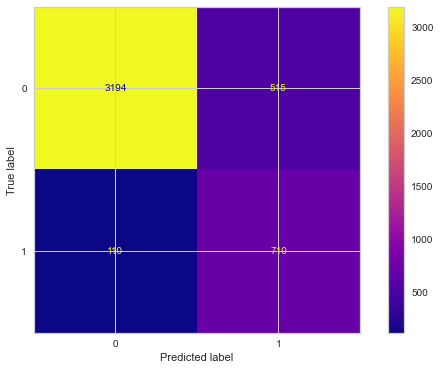

In [963]:
print("LogReg_TFIDF Model")
print("------------------")
eval(logreg_tfidf, X_train_tf_idf, X_test_tf_idf)

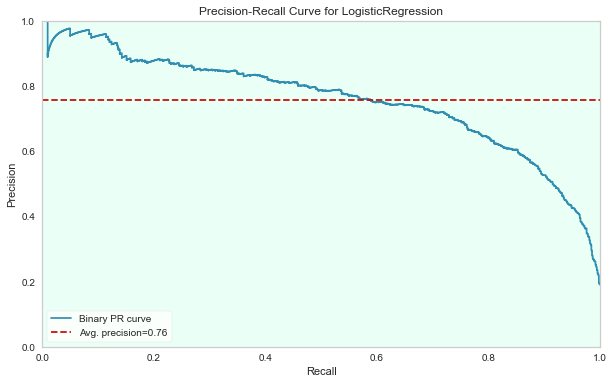

In [964]:
from yellowbrick.classifier import PrecisionRecallCurve
viz = PrecisionRecallCurve(
    LogisticRegression(C = 1, max_iter = 1000, class_weight = "balanced", random_state=101),
    classes = logreg_count.classes_,
    per_class = True,
    cmap = "Set1")

fig, ax = plt.subplots(figsize = (10, 6))
ax.set_facecolor('#eafff5')

viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [965]:
y_pred = logreg_tfidf.predict(X_test_tf_idf)
log_tf_idf_rec = recall_score(y_test, y_pred, pos_label = 0, average = None)
log_tf_idf_f1 = f1_score(y_test, y_pred, pos_label = 0, average = None)
log_tf_idf_AP = viz.score_

In [966]:
print("viz.score_       : ", viz.score_)
print("LogReg_TFIDF_rec : ", log_tf_idf_rec)
print("LogReg_TFIDF_f1  : ", log_tf_idf_f1)
print("LogReg_TFIDF_AP  : ", log_tf_idf_AP)

viz.score_       :  0.7575547748794174
LogReg_TFIDF_rec :  [0.86114856 0.86585366]
LogReg_TFIDF_f1  :  [0.91087979 0.69437653]
LogReg_TFIDF_AP  :  0.7575547748794174


### TF-IDF ***Cross Validation***

In [967]:
custom_scorer = {'accuracy': make_scorer(accuracy_score),
                 'precision-0': make_scorer(precision_score, pos_label = 0),
                 'recall-0': make_scorer(recall_score, pos_label = 0),
                 'f1-0': make_scorer(f1_score, pos_label = 0),
                 'precision-1': make_scorer(precision_score, pos_label = 1),
                 'recall-1': make_scorer(recall_score, pos_label = 1),
                 'f1-1': make_scorer(f1_score, pos_label = 1)
                 }

for i, j in custom_scorer.items():
    LogisticRegression(C = 1, max_iter = 1000, random_state = 101, class_weight = "balanced")
    scores = cross_val_score(model, X_train_tf_idf, y_train, cv = 10, scoring = j).mean()
    if i == "recall-1":
        log_tfidf_rec = scores
    elif i == "f1-1":
        log_tfidf_f1 = scores
    print(f" {i:20} score for LogReg_TFIDF : {scores}\n")

 accuracy             score for LogReg_TFIDF : 0.8467314961426554

 precision-0          score for LogReg_TFIDF : 0.9638506522179379

 recall-0             score for LogReg_TFIDF : 0.8445145158153593

 f1-0                 score for LogReg_TFIDF : 0.9002335042119063

 precision-1          score for LogReg_TFIDF : 0.549399100583095

 recall-1             score for LogReg_TFIDF : 0.8567508710801393

 f1-1                 score for LogReg_TFIDF : 0.6694321677322225



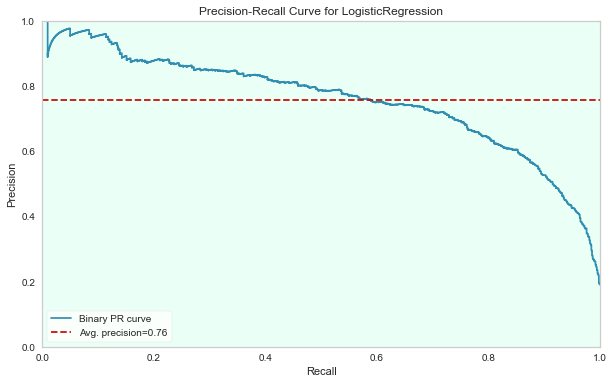

In [968]:
viz = PrecisionRecallCurve(
    LogisticRegression(C = 1, max_iter = 1000, random_state = 101, class_weight = "balanced"),
    classes = logreg_tfidf.classes_,
    per_class = True,
    cmap = "Set1")

fig, ax = plt.subplots(figsize = (10, 6))
ax.set_facecolor('#eafff5')

viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [969]:
LogReg_TFIDF_AP = viz.score_
LogReg_TFIDF_AP

0.7575547748794174

## Naive Bayes 

### Countvectorizer ***MultinomialNB***

In [970]:
from sklearn.naive_bayes import MultinomialNB

In [971]:
nbmulti_count = MultinomialNB()
nbmulti_count.fit(X_train_count,y_train)

MultinomialNB()

NBMulti_Count Model
-------------------
[[3367  342]
 [ 189  631]]
Test_Set
              precision    recall  f1-score   support

           0       0.95      0.91      0.93      3709
           1       0.65      0.77      0.70       820

    accuracy                           0.88      4529
   macro avg       0.80      0.84      0.82      4529
weighted avg       0.89      0.88      0.89      4529

Train_Set
              precision    recall  f1-score   support

           0       0.96      0.92      0.94     14831
           1       0.70      0.81      0.75      3281

    accuracy                           0.90     18112
   macro avg       0.83      0.87      0.84     18112
weighted avg       0.91      0.90      0.91     18112



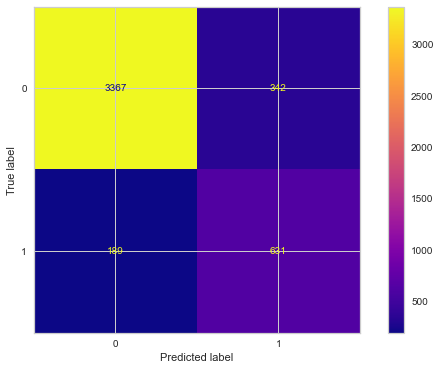

In [972]:
print("NBMulti_Count Model")
print("-------------------")
eval(nbmulti_count, X_train_count, X_test_count)

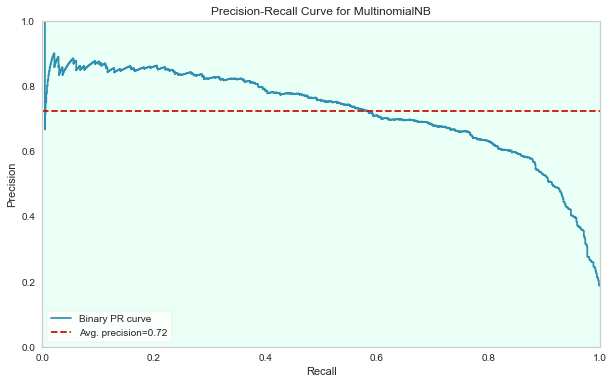

In [973]:
from yellowbrick.classifier import PrecisionRecallCurve

viz = PrecisionRecallCurve(
      MultinomialNB(),
      classes = nbmulti_count.classes_,  
      per_class = True,
      cmap = "Set1")

fig, ax = plt.subplots(figsize = (10, 6))
ax.set_facecolor('#eafff5')

viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [974]:
y_pred = nbmulti_count.predict(X_test_count)
nb_multi_count_rec = recall_score(y_test, y_pred, pos_label = 0, average = None)
nb_multi_count_f1 = f1_score(y_test, y_pred, pos_label = 0, average = None)
nb_multi_count_AP = viz.score_

In [975]:
print("viz.score_         : ", viz.score_)
print("NBMulti_Count_rec : ", nb_multi_count_rec)
print("NBMulti_Count_f1  : ", nb_multi_count_f1)
print("NBMulti_Count_AP  : ", nb_multi_count_AP)

viz.score_         :  0.7218786471841454
NBMulti_Count_rec :  [0.90779186 0.7695122 ]
NBMulti_Count_f1  :  [0.92690984 0.7038483 ]
NBMulti_Count_AP  :  0.7218786471841454


### Countvectorize ***MultinomialNB with Cross Validation***

In [976]:
custom_scorer = {'accuracy': make_scorer(accuracy_score),
                 'precision-0': make_scorer(precision_score, pos_label=0),
                 'recall-0': make_scorer(recall_score, pos_label=0),
                 'f1-0': make_scorer(f1_score, pos_label=0),
                 'precision-1': make_scorer(precision_score, pos_label=1),
                 'recall-1': make_scorer(recall_score, pos_label=1),
                 'f1-1': make_scorer(f1_score, pos_label=1)
                 }

for i, j in custom_scorer.items():
    model = MultinomialNB()
    scores = cross_val_score(model, X_train_count, y_train, cv = 10, scoring = j).mean()
    if i == "recall-1":
        nbm_count_rec = scores
    elif i == "f1-1":
        nbm_count_f1 = scores
    print(f" {i:20} score for NBMulti_Count : {scores}\n")

 accuracy             score for NBMulti_Count : 0.8813495343028805

 precision-0          score for NBMulti_Count : 0.9412857484922779

 recall-0             score for NBMulti_Count : 0.9120085588148159

 f1-0                 score for NBMulti_Count : 0.9264038294424036

 precision-1          score for NBMulti_Count : 0.6514318318579427

 recall-1             score for NBMulti_Count : 0.7427570613092149

 f1-1                 score for NBMulti_Count : 0.6939716861825261



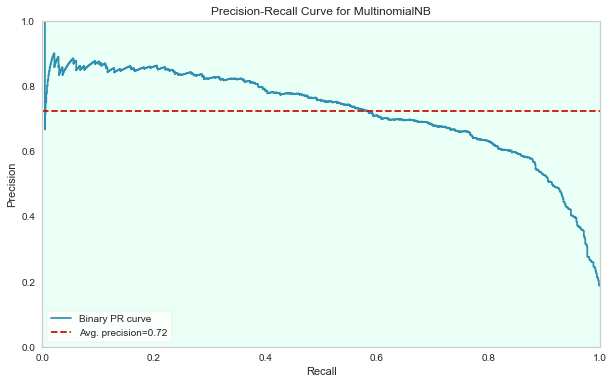

In [977]:
from yellowbrick.classifier import PrecisionRecallCurve

viz = PrecisionRecallCurve(
    MultinomialNB(),
    classes = nbmulti_count.classes_,  
    per_class = True,
    cmap = "Set1"
)

fig, ax = plt.subplots(figsize = (10, 6))
ax.set_facecolor('#eafff5')

viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [978]:
NBMulti_Count_AP = viz.score_
NBMulti_Count_AP

0.7218786471841454

### Countvectorize ***BernoulliNB***

In [979]:
from sklearn.naive_bayes import BernoulliNB

In [980]:
nbberno_count = BernoulliNB()
nbberno_count.fit(X_train_count,y_train)

BernoulliNB()

NBBerno_Count Model
-------------------
[[3372  337]
 [ 223  597]]
Test_Set
              precision    recall  f1-score   support

           0       0.94      0.91      0.92      3709
           1       0.64      0.73      0.68       820

    accuracy                           0.88      4529
   macro avg       0.79      0.82      0.80      4529
weighted avg       0.88      0.88      0.88      4529

Train_Set
              precision    recall  f1-score   support

           0       0.95      0.92      0.94     14831
           1       0.69      0.79      0.74      3281

    accuracy                           0.90     18112
   macro avg       0.82      0.86      0.84     18112
weighted avg       0.90      0.90      0.90     18112



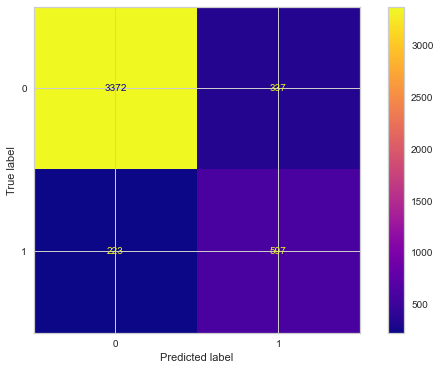

In [981]:
print("NBBerno_Count Model")
print("-------------------")
eval(nbberno_count, X_train_count, X_test_count)

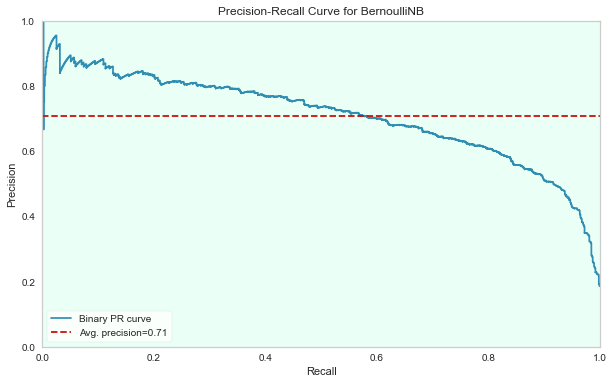

In [982]:
from yellowbrick.classifier import PrecisionRecallCurve

viz = PrecisionRecallCurve(
      BernoulliNB(),
      classes = nbberno_count.classes_,  
      per_class = True,
      cmap = "Set1")

fig, ax = plt.subplots(figsize = (10, 6))
ax.set_facecolor('#eafff5')

viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [983]:
y_pred = nbberno_count.predict(X_test_count)
nb_ber_count_rec = recall_score(y_test, y_pred, pos_label = 0, average = None)
nb_ber_count_f1 = f1_score(y_test, y_pred, pos_label = 0, average = None)
nb_ber_count_AP = viz.score_

In [984]:
print("viz.score_        : ", viz.score_)
print("NBBerno_Count_rec : ", nb_ber_count_rec)
print("NBBerno_Count_f1  : ", nb_ber_count_f1)
print("NBBerno_Count_AP  : ", nb_ber_count_AP)

viz.score_        :  0.7081084492502941
NBBerno_Count_rec :  [0.90913993 0.72804878]
NBBerno_Count_f1  :  [0.92332968 0.68072976]
NBBerno_Count_AP  :  0.7081084492502941


### Countvectorize ***BernoulliNB with Cross Validation***

In [985]:
custom_scorer = {'accuracy': make_scorer(accuracy_score),
                 'precision-0': make_scorer(precision_score, pos_label = 0),
                 'recall-0': make_scorer(recall_score, pos_label = 0),
                 'f1-0': make_scorer(f1_score, pos_label = 0),
                 'precision-1': make_scorer(precision_score, pos_label = 1),
                 'recall-1': make_scorer(recall_score, pos_label = 1),
                 'f1-1': make_scorer(f1_score, pos_label = 1)
                 }

for i, j in custom_scorer.items():
    model = BernoulliNB()
    scores = cross_val_score(model, X_train_count, y_train, cv = 10, scoring = j).mean()
    if i == "recall-1":
        nbb_count_rec = scores
    elif i == "f1-1":
        nbb_count_f1 = scores
    print(f" {i:20} score for NBBerno_Count : {scores}\n")

 accuracy             score for NBBerno_Count : 0.8757729621408539

 precision-0          score for NBBerno_Count : 0.9366430562952583

 recall-0             score for NBBerno_Count : 0.9098510886179941

 f1-0                 score for NBBerno_Count : 0.923040653789567

 precision-1          score for NBBerno_Count : 0.6393710181522845

 recall-1             score for NBBerno_Count : 0.7217251093483579

 f1-1                 score for NBBerno_Count : 0.6779215122777578



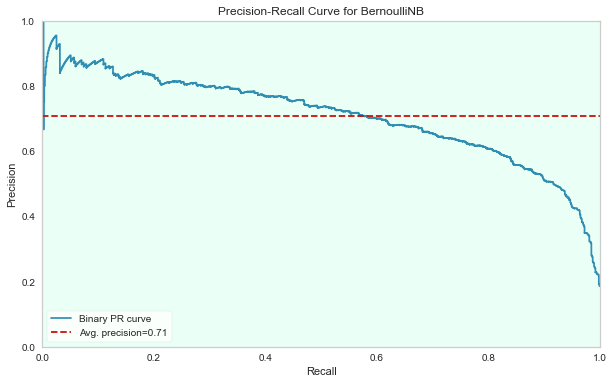

In [986]:
from yellowbrick.classifier import PrecisionRecallCurve

viz = PrecisionRecallCurve(
      BernoulliNB(),
      classes = nbberno_count.classes_,  
      per_class = True,
      cmap = "Set1")

fig, ax = plt.subplots(figsize = (10, 6))
ax.set_facecolor('#eafff5')

viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [987]:
NBBerno_Count_AP = viz.score_
NBBerno_Count_AP

0.7081084492502941

### TF-IDF ***MultinomialNB***

In [988]:
nbmulti_tfidf = MultinomialNB()
nbmulti_tfidf.fit(X_train_tf_idf,y_train)

MultinomialNB()

NBMulti_TFIDF MODEL
-------------------
[[3690   19]
 [ 688  132]]
Test_Set
              precision    recall  f1-score   support

           0       0.84      0.99      0.91      3709
           1       0.87      0.16      0.27       820

    accuracy                           0.84      4529
   macro avg       0.86      0.58      0.59      4529
weighted avg       0.85      0.84      0.80      4529

Train_Set
              precision    recall  f1-score   support

           0       0.85      1.00      0.92     14831
           1       0.94      0.23      0.37      3281

    accuracy                           0.86     18112
   macro avg       0.90      0.61      0.64     18112
weighted avg       0.87      0.86      0.82     18112



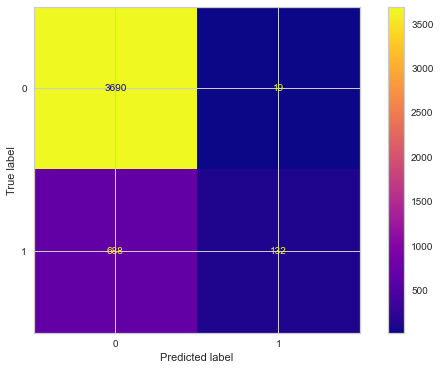

In [989]:
print("NBMulti_TFIDF MODEL")
print("-------------------")
eval(nbmulti_tfidf, X_train_tf_idf, X_test_tf_idf)

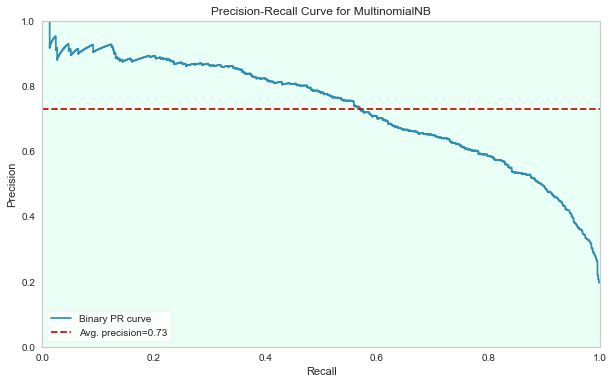

In [990]:
from yellowbrick.classifier import PrecisionRecallCurve

viz = PrecisionRecallCurve(
      MultinomialNB(),
      classes = nbmulti_tfidf.classes_,
      per_class = True,
      cmap = "Set1")

fig, ax = plt.subplots(figsize = (10, 6))
ax.set_facecolor('#eafff5')

viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [991]:
y_pred = nbmulti_tfidf.predict(X_test_tf_idf)
nb_multi_tf_idf_rec = recall_score(y_test, y_pred, pos_label = 0, average = None)
nb_multi_tf_idf_f1 = f1_score(y_test, y_pred, pos_label = 0, average = None)
nb_multi_tf_idf_AP = viz.score_

In [992]:
print("viz.score_        : ", viz.score_)
print("NBMulti_TFIDF_rec : ", nb_multi_tf_idf_rec)
print("NBMulti_TFIDF_f1  : ", nb_multi_tf_idf_f1)
print("NBMulti_TFIDF_AP  : ", nb_multi_tf_idf_AP)

viz.score_        :  0.7305393622908835
NBMulti_TFIDF_rec :  [0.99487733 0.16097561]
NBMulti_TFIDF_f1  :  [0.91257574 0.27188465]
NBMulti_TFIDF_AP  :  0.7305393622908835


### TF-IDF ***MultinomialNB with Cross Validation***

In [993]:
custom_scorer = {'accuracy': make_scorer(accuracy_score),
                 'precision-0': make_scorer(precision_score, pos_label = 0),
                 'recall-0': make_scorer(recall_score, pos_label = 0),
                 'f1-0': make_scorer(f1_score, pos_label = 0),
                 'precision-1': make_scorer(precision_score, pos_label = 1),
                 'recall-1': make_scorer(recall_score, pos_label = 1),
                 'f1-1': make_scorer(f1_score, pos_label = 1)
                 }

for i, j in custom_scorer.items():
    model = MultinomialNB()
    scores = cross_val_score(model, X_train_tf_idf, y_train, cv = 10, scoring = j).mean()
    if i == "recall-1":
        nbm_tfidf_rec = scores
    elif i == "f1-1":
        nbm_tfidf_f1 = scores
    print(f" {i:20} score for NBMulti_TFIDF : {scores}\n")

 accuracy             score for NBMulti_TFIDF : 0.8446887916985115

 precision-0          score for NBMulti_TFIDF : 0.8428300282267893

 recall-0             score for NBMulti_TFIDF : 0.9960894177134205

 f1-0                 score for NBMulti_TFIDF : 0.9130715544723733

 precision-1          score for NBMulti_TFIDF : 0.8994343183185245

 recall-1             score for NBMulti_TFIDF : 0.16031859292757059

 f1-1                 score for NBMulti_TFIDF : 0.2719006756069967



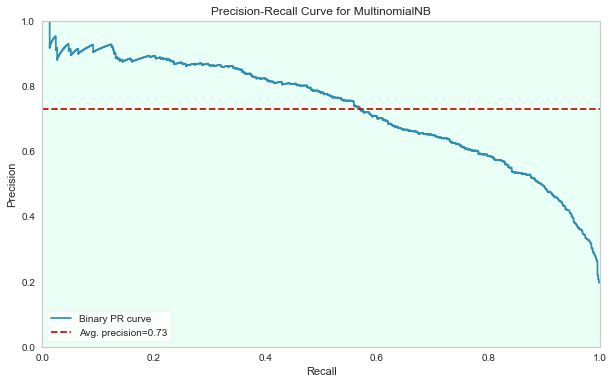

In [994]:
from yellowbrick.classifier import PrecisionRecallCurve

viz = PrecisionRecallCurve(
      MultinomialNB(),
      classes = nbmulti_tfidf.classes_,
      per_class = True,
      cmap = "Set1")

fig, ax = plt.subplots(figsize = (10, 6))
ax.set_facecolor('#eafff5')

viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [995]:
NBMulti_TFIDF_AP = viz.score_
NBMulti_TFIDF_AP

0.7305393622908835

### TF-IDF ***BernoulliNB***

In [996]:
nbberno_tfidf = BernoulliNB()
nbberno_tfidf.fit(X_train_tf_idf,y_train)

BernoulliNB()

NBBerno_TFIDF MODEL
-------------------
[[3372  337]
 [ 223  597]]
Test_Set
              precision    recall  f1-score   support

           0       0.94      0.91      0.92      3709
           1       0.64      0.73      0.68       820

    accuracy                           0.88      4529
   macro avg       0.79      0.82      0.80      4529
weighted avg       0.88      0.88      0.88      4529

Train_Set
              precision    recall  f1-score   support

           0       0.95      0.92      0.94     14831
           1       0.69      0.79      0.74      3281

    accuracy                           0.90     18112
   macro avg       0.82      0.86      0.84     18112
weighted avg       0.90      0.90      0.90     18112



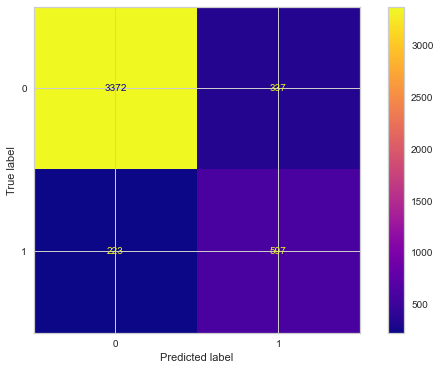

In [997]:
print("NBBerno_TFIDF MODEL")
print("-------------------")
eval(nbberno_tfidf, X_train_tf_idf, X_test_tf_idf)

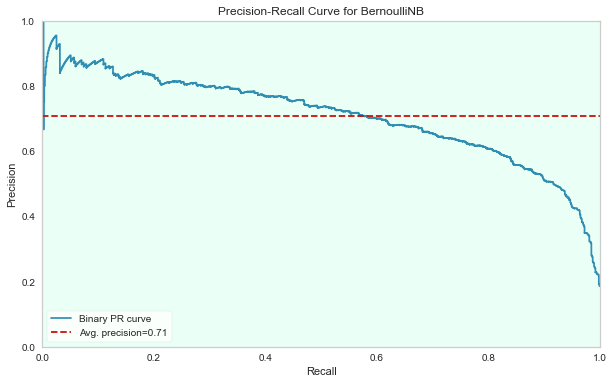

In [998]:
from yellowbrick.classifier import PrecisionRecallCurve

viz = PrecisionRecallCurve(
      BernoulliNB(),
      classes = nbberno_tfidf.classes_, 
      per_class = True,
      cmap = "Set1")

fig, ax = plt.subplots(figsize = (10, 6))
ax.set_facecolor('#eafff5')

viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [999]:
y_pred = nbberno_tfidf.predict(X_test_tf_idf)
nb_ber_tf_idf_rec = recall_score(y_test, y_pred, pos_label = 0, average = None)
nb_ber_tf_idf_f1 = f1_score(y_test, y_pred, pos_label = 0, average = None)
nb_ber_tf_idf_AP = viz.score_

In [1000]:
print("viz.score_        : ", viz.score_)
print("NBBerno_TFIDF_rec : ", nb_multi_tf_idf_rec)
print("NBBerno_TFIDF_f1  : ", nb_multi_tf_idf_f1)
print("NBBerno_TFIDF_AP  : ", nb_multi_tf_idf_AP)

viz.score_        :  0.7081084492502941
NBBerno_TFIDF_rec :  [0.99487733 0.16097561]
NBBerno_TFIDF_f1  :  [0.91257574 0.27188465]
NBBerno_TFIDF_AP  :  0.7305393622908835


### TF-IDF ***BernoulliNB with Cross Validation***

In [1001]:
custom_scorer = {'accuracy': make_scorer(accuracy_score),
                 'precision-0': make_scorer(precision_score, pos_label = 0),
                 'recall-0': make_scorer(recall_score, pos_label = 0),
                 'f1-0': make_scorer(f1_score, pos_label = 0),
                 'precision-1': make_scorer(precision_score, pos_label = 1),
                 'recall-1': make_scorer(recall_score, pos_label = 1),
                 'f1-1': make_scorer(f1_score, pos_label = 1)
                 }

for i, j in custom_scorer.items():
    model = BernoulliNB()
    scores = cross_val_score(model, X_train_tf_idf, y_train, cv = 10, scoring = j).mean()
    if i == "recall-1":
        nbb_tfidf_rec = scores
    elif i == "f1-1":
        nbb_tfidf_f1 = scores
    print(f" {i:20} score for NBBerno_TFIDF : {scores}\n")

 accuracy             score for NBBerno_TFIDF : 0.8757729621408539

 precision-0          score for NBBerno_TFIDF : 0.9366430562952583

 recall-0             score for NBBerno_TFIDF : 0.9098510886179941

 f1-0                 score for NBBerno_TFIDF : 0.923040653789567

 precision-1          score for NBBerno_TFIDF : 0.6393710181522845

 recall-1             score for NBBerno_TFIDF : 0.7217251093483579

 f1-1                 score for NBBerno_TFIDF : 0.6779215122777578



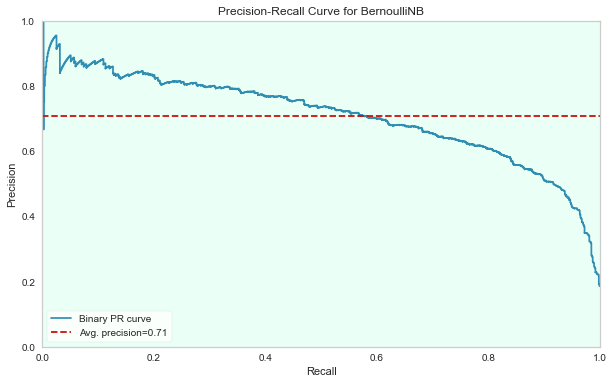

In [1002]:
from yellowbrick.classifier import PrecisionRecallCurve

viz = PrecisionRecallCurve(
      BernoulliNB(),
      classes = nbberno_tfidf.classes_, 
      per_class = True,
      cmap = "Set1")

fig, ax = plt.subplots(figsize = (10, 6))
ax.set_facecolor('#eafff5')

viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [1003]:
NBBerno_TFIDF_AP = viz.score_
NBBerno_TFIDF_AP

0.7081084492502941

## Support Vector Machine (SVM)

### Countvectorizer

In [1004]:
from sklearn.svm import LinearSVC
svc_count = LinearSVC(C = 0.01, class_weight = "balanced", random_state = 101)  
svc_count.fit(X_train_count,y_train)

LinearSVC(C=0.01, class_weight='balanced', random_state=101)

SVC_Count Model
---------------
[[3200  509]
 [ 117  703]]
Test_Set
              precision    recall  f1-score   support

           0       0.96      0.86      0.91      3709
           1       0.58      0.86      0.69       820

    accuracy                           0.86      4529
   macro avg       0.77      0.86      0.80      4529
weighted avg       0.90      0.86      0.87      4529

Train_Set
              precision    recall  f1-score   support

           0       0.98      0.89      0.93     14831
           1       0.65      0.92      0.76      3281

    accuracy                           0.90     18112
   macro avg       0.81      0.91      0.85     18112
weighted avg       0.92      0.90      0.90     18112



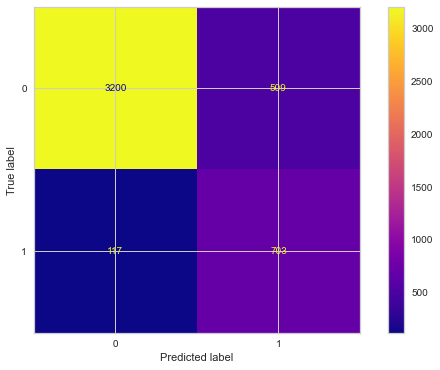

In [1005]:
print("SVC_Count Model")
print("---------------")
eval(svc_count, X_train_count, X_test_count)

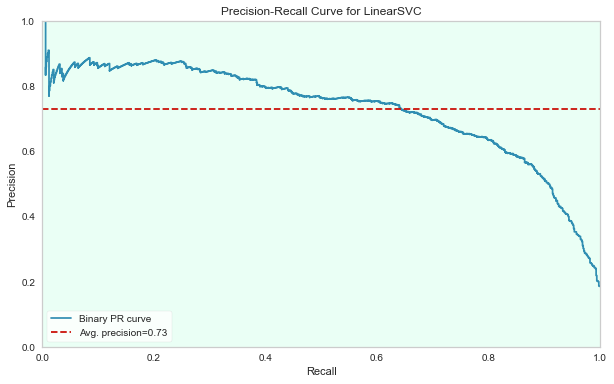

In [1006]:
viz = PrecisionRecallCurve(
      LinearSVC(C = 0.01, class_weight = "balanced", random_state = 101),
      classes = svc_count.classes_,
      per_class = True,
      cmap = "Set1")

fig, ax = plt.subplots(figsize = (10, 6))
ax.set_facecolor('#eafff5')

viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [1007]:
y_pred = svc_count.predict(X_test_count)
svc_count_rec = recall_score(y_test, y_pred, pos_label = 0, average = None)
svc_count_f1 = f1_score(y_test, y_pred, pos_label = 0, average = None)
svc_count_AP = viz.score_

In [1008]:
print("viz.score_    : ", viz.score_)
print("SVC_Count_rec : ", svc_count_rec)
print("SVC_Count_f1  : ", svc_count_f1)
print("SVC_Count_AP  : ", svc_count_AP)

viz.score_    :  0.7297423760011968
SVC_Count_rec :  [0.86276624 0.85731707]
SVC_Count_f1  :  [0.91090236 0.69192913]
SVC_Count_AP  :  0.7297423760011968


### CountVectorizer ***With Cross Validation***

In [1009]:
custom_scorer = {'accuracy': make_scorer(accuracy_score),
                 'precision-0': make_scorer(precision_score, pos_label = 0),
                 'recall-0': make_scorer(recall_score, pos_label = 0),
                 'f1-0': make_scorer(f1_score, pos_label = 0),
                 'precision-1': make_scorer(precision_score, pos_label = 1),
                 'recall-1': make_scorer(recall_score, pos_label = 1),
                 'f1-1': make_scorer(f1_score, pos_label = 1)
                 }

for i, j in custom_scorer.items():
    model = LinearSVC(C = 0.01, class_weight = "balanced", random_state = 101)
    scores = cross_val_score(model, X_train_count, y_train, cv = 10, scoring = j).mean()
    if i == "recall-1":
        svc_count_rec = scores
    elif i == "f1-1":
        svc_count_f1 = scores
    print(f" {i:20} score for SVC_Count : {scores}\n")

 accuracy             score for SVC_Count : 0.8633511116149408

 precision-0          score for SVC_Count : 0.9576445096515614

 recall-0             score for SVC_Count : 0.8716879349610046

 f1-0                 score for SVC_Count : 0.9126325773870748

 precision-1          score for SVC_Count : 0.5875576596293313

 recall-1             score for SVC_Count : 0.8256699903625175

 f1-1                 score for SVC_Count : 0.6864632906156078



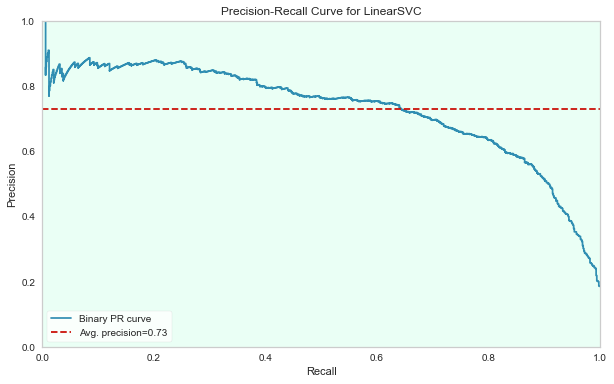

In [1010]:
viz = PrecisionRecallCurve(
      LinearSVC(C = 0.01, class_weight = "balanced", random_state = 101),
      classes = svc_count.classes_,
      per_class = True,
      cmap = "Set1")

fig, ax = plt.subplots(figsize = (10, 6))
ax.set_facecolor('#eafff5')

viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [1011]:
SVC_Count_AP = viz.score_
SVC_Count_AP

0.7297423760011968

### TD-IDF

In [1012]:
svc_tf_idf = LinearSVC(C = 0.01, class_weight = "balanced", random_state = 101)  
svc_tf_idf.fit(X_train_tf_idf,y_train)

LinearSVC(C=0.01, class_weight='balanced', random_state=101)

SVC_TFIDF Model
---------------
[[3112  597]
 [ 109  711]]
Test_Set
              precision    recall  f1-score   support

           0       0.97      0.84      0.90      3709
           1       0.54      0.87      0.67       820

    accuracy                           0.84      4529
   macro avg       0.75      0.85      0.78      4529
weighted avg       0.89      0.84      0.86      4529

Train_Set
              precision    recall  f1-score   support

           0       0.97      0.85      0.91     14831
           1       0.56      0.89      0.69      3281

    accuracy                           0.86     18112
   macro avg       0.77      0.87      0.80     18112
weighted avg       0.90      0.86      0.87     18112



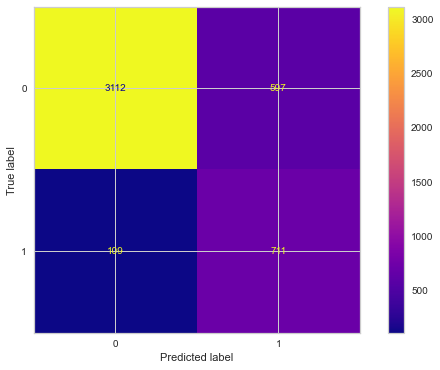

In [1013]:
print("SVC_TFIDF Model")
print("---------------")
eval(svc_tf_idf, X_train_tf_idf, X_test_tf_idf)

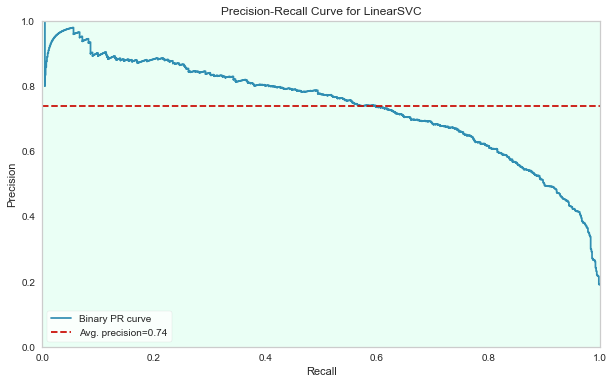

In [1014]:
viz = PrecisionRecallCurve(
      LinearSVC(C = 0.01, class_weight = "balanced", random_state = 101),
      classes = svc_tf_idf.classes_,
      per_class = True,
      cmap = "Set1"
)

fig, ax = plt.subplots(figsize = (10, 6))
ax.set_facecolor('#eafff5')

viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [1015]:
y_pred = svc_tf_idf.predict(X_test_tf_idf)
svc_tf_idf_rec = recall_score(y_test, y_pred, pos_label = 0, average = None)
svc_tf_idf_f1 = f1_score(y_test, y_pred, pos_label = 0, average = None)
svc_tf_idf_AP = viz.score_

In [1016]:
print("viz.score_     : ", viz.score_)
print("SVC_TFIDF_rec   : ", svc_tf_idf_rec)
print("SVC_TFIDF_f1   : ", svc_tf_idf_f1)
print("SVC_TFIDF_AP   : ", svc_tf_idf_AP)

viz.score_     :  0.7385423319680948
SVC_TFIDF_rec   :  [0.83904017 0.86707317]
SVC_TFIDF_f1   :  [0.8981241  0.66823308]
SVC_TFIDF_AP   :  0.7385423319680948


### TFIDF ***With Cross Validation***

In [1017]:
custom_scorer = {'accuracy': make_scorer(accuracy_score),
                 'precision-0': make_scorer(precision_score, pos_label = 0),
                 'recall-0': make_scorer(recall_score, pos_label = 0),
                 'f1-0': make_scorer(f1_score, pos_label = 0),
                 'precision-1': make_scorer(precision_score, pos_label = 1),
                 'recall-1': make_scorer(recall_score, pos_label = 1),
                 'f1-1': make_scorer(f1_score, pos_label = 1)
                 }

for i, j in custom_scorer.items():
    model = LinearSVC(C = 0.01, class_weight = "balanced", random_state = 101)
    scores = cross_val_score(model, X_train_tf_idf, y_train, cv = 10, scoring = j).mean()
    if i == "recall-1":
        svc_tfidf_rec = scores
    elif i == "f1-1":
        svc_tfidf_f1 = scores
    print(f" {i:20} score for SVC_TFIDF : {scores}\n")

 accuracy             score for SVC_TFIDF : 0.8455167891094769

 precision-0          score for SVC_TFIDF : 0.9647885535517146

 recall-0             score for SVC_TFIDF : 0.8420871403307567

 f1-0                 score for SVC_TFIDF : 0.8992617417862186

 precision-1          score for SVC_TFIDF : 0.5467916128313168

 recall-1             score for SVC_TFIDF : 0.8610191637630662

 f1-1                 score for SVC_TFIDF : 0.6687929992780911



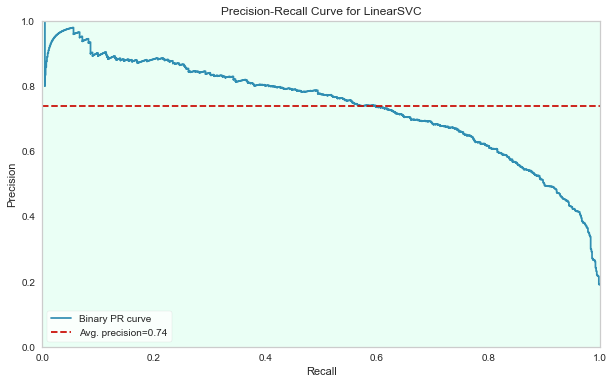

In [1018]:
viz = PrecisionRecallCurve(
      LinearSVC(C = 0.01, class_weight = "balanced", random_state = 101),
      classes = svc_tf_idf.classes_,
      per_class = True,
      cmap = "Set1")

fig, ax = plt.subplots(figsize=(10, 6))
ax.set_facecolor('#eafff5')

viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [1019]:
SVC_TFIDF_AP = viz.score_
SVC_TFIDF_AP

0.7385423319680948

## Random Forest

### CountVectorizer

In [1020]:
from sklearn.ensemble import RandomForestClassifier

rf_count = RandomForestClassifier(n_estimators = 200, max_depth = 11, class_weight = "balanced", random_state = 101, n_jobs = -1)
rf_count.fit(X_train_count, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=11, n_estimators=200,
                       n_jobs=-1, random_state=101)

RF_Count Model
--------------
[[3173  536]
 [ 161  659]]
Test_Set
              precision    recall  f1-score   support

           0       0.95      0.86      0.90      3709
           1       0.55      0.80      0.65       820

    accuracy                           0.85      4529
   macro avg       0.75      0.83      0.78      4529
weighted avg       0.88      0.85      0.86      4529

Train_Set
              precision    recall  f1-score   support

           0       0.97      0.88      0.92     14831
           1       0.61      0.88      0.72      3281

    accuracy                           0.88     18112
   macro avg       0.79      0.88      0.82     18112
weighted avg       0.90      0.88      0.88     18112



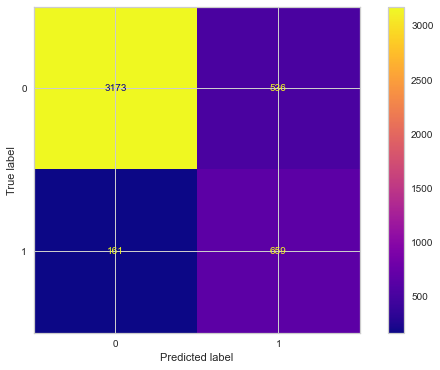

In [1021]:
print("RF_Count Model")
print("--------------")
eval(rf_count, X_train_count, X_test_count)

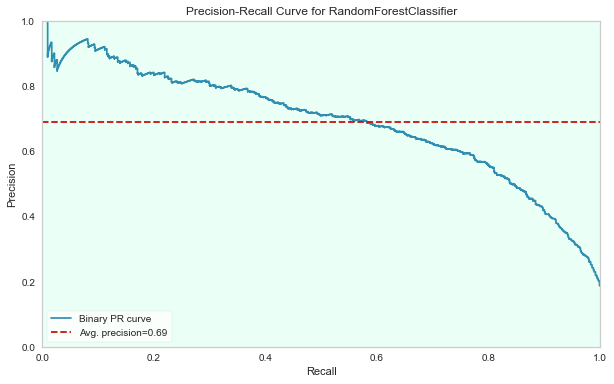

In [1022]:
viz = PrecisionRecallCurve(
      RandomForestClassifier(n_estimators = 200, max_depth = 11, class_weight = "balanced", random_state = 101, n_jobs = -1),
      classes = rf_count.classes_,
      per_class = True,
      cmap = "Set1")

fig, ax = plt.subplots(figsize=(10, 6))
ax.set_facecolor('#eafff5')

viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [1023]:
y_pred = rf_count.predict(X_test_count)
rf_count_rec = recall_score(y_test, y_pred, pos_label = 0, average = None)
rf_count_f1 = f1_score(y_test, y_pred, pos_label = 0, average = None)
rf_count_AP = viz.score_

In [1024]:
print("viz.score_   : ", viz.score_)
print("RF_Count_rec : ", rf_count_rec)
print("RF_Count_f1  : ", rf_count_f1)
print("RF_Count_AP  : ", rf_count_AP)

viz.score_   :  0.6891163342684158
RF_Count_rec :  [0.85548665 0.80365854]
RF_Count_f1  :  [0.90103649 0.65409429]
RF_Count_AP  :  0.6891163342684158


### CountVectorizer with Cross Validation

In [1025]:
custom_scorer = {'accuracy': make_scorer(accuracy_score),
                 'precision-0': make_scorer(precision_score, pos_label = 0),
                 'recall-0': make_scorer(recall_score, pos_label = 0),
                 'f1-0': make_scorer(f1_score, pos_label = 0),
                 'precision-1': make_scorer(precision_score, pos_label = 1),
                 'recall-1': make_scorer(recall_score, pos_label = 1),
                 'f1-1': make_scorer(f1_score, pos_label = 1)
                 }

for i, j in custom_scorer.items():
    model = RandomForestClassifier(n_estimators = 200, max_depth = 11, class_weight = "balanced", random_state = 101, n_jobs = -1)
    scores = cross_val_score(model, X_train_count, y_train, cv = 10, scoring = j).mean()
    if i == "recall-1":
        rf_count_rec = scores
    elif i == "f1-1":
        rf_count_f1 = scores
    print(f" {i:20} score for RF_Count : {scores}\n")

 accuracy             score for RF_Count : 0.8439156162426574

 precision-0          score for RF_Count : 0.9492877521456187

 recall-0             score for RF_Count : 0.8551006192372494

 f1-0                 score for RF_Count : 0.8996897185004938

 precision-1          score for RF_Count : 0.5482900197028364

 recall-1             score for RF_Count : 0.7933631106827786

 f1-1                 score for RF_Count : 0.6481901866782025



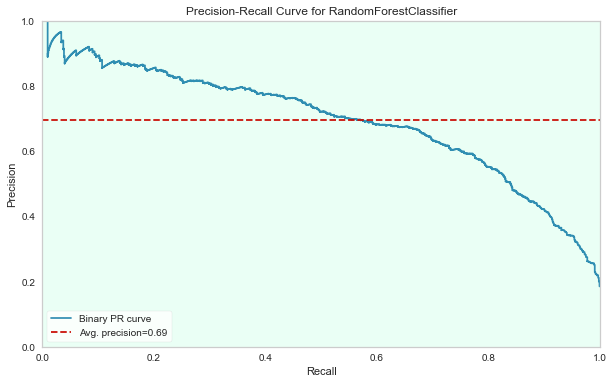

In [1026]:
viz = PrecisionRecallCurve(
      RandomForestClassifier(200, max_depth = 12, random_state = 42, n_jobs = -1, class_weight="balanced"),
      classes = rf_count.classes_,
      per_class = True,
      cmap = "Set1")

fig, ax = plt.subplots(figsize=(10, 6))
ax.set_facecolor('#eafff5')

viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [1027]:
RF_Count_AP = viz.score_
RF_Count_AP

0.6938358082901592

### TF-IDF

In [1028]:
rf_tf_idf = RandomForestClassifier(n_estimators = 200, max_depth = 11, class_weight = "balanced", random_state = 101, n_jobs = -1)
rf_tf_idf.fit(X_train_tf_idf, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=11, n_estimators=200,
                       n_jobs=-1, random_state=101)

RF_TFIDF Model
--------------
[[3117  592]
 [ 167  653]]
Test_Set
              precision    recall  f1-score   support

           0       0.95      0.84      0.89      3709
           1       0.52      0.80      0.63       820

    accuracy                           0.83      4529
   macro avg       0.74      0.82      0.76      4529
weighted avg       0.87      0.83      0.84      4529

Train_Set
              precision    recall  f1-score   support

           0       0.97      0.87      0.92     14831
           1       0.61      0.90      0.72      3281

    accuracy                           0.88     18112
   macro avg       0.79      0.88      0.82     18112
weighted avg       0.91      0.88      0.88     18112



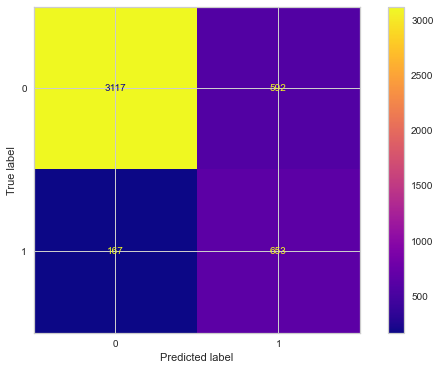

In [1029]:
print("RF_TFIDF Model")
print("--------------")
eval(rf_tf_idf, X_train_tf_idf, X_test_tf_idf)

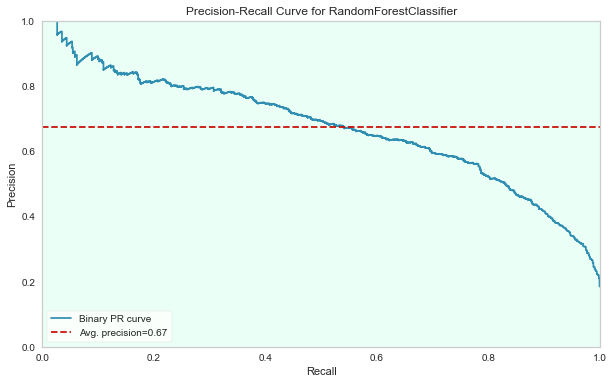

In [1030]:
viz = PrecisionRecallCurve(
      RandomForestClassifier(n_estimators = 200, max_depth = 11, class_weight = "balanced", random_state = 101, n_jobs = -1),
      classes = rf_tf_idf.classes_,
      per_class = True,
      cmap = "Set1")

fig, ax = plt.subplots(figsize=(10, 6))
ax.set_facecolor('#eafff5')

viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [1031]:
y_pred = rf_tf_idf.predict(X_test_tf_idf)
rf_tf_idf_rec = recall_score(y_test, y_pred, pos_label = 0, average = None)
rf_tf_idf_f1 = f1_score(y_test, y_pred, pos_label = 0, average = None)
rf_tf_idf_AP = viz.score_

In [1032]:
print("viz.score_   : ", viz.score_)
print("RF_TFIDF_rec : ", rf_tf_idf_rec)
print("RF_TFIDF_f1  : ", rf_tf_idf_f1)
print("RF_TFIDF_AP  : ", rf_tf_idf_AP)

viz.score_   :  0.673726951914478
RF_TFIDF_rec :  [0.84038824 0.79634146]
RF_TFIDF_f1  :  [0.89146289 0.63244552]
RF_TFIDF_AP  :  0.673726951914478


### TF-IDF with Cross Validation

In [1033]:
custom_scorer = {'accuracy': make_scorer(accuracy_score),
                 'precision-0': make_scorer(precision_score, pos_label = 0),
                 'recall-0': make_scorer(recall_score, pos_label = 0),
                 'f1-0': make_scorer(f1_score, pos_label = 0),
                 'precision-1': make_scorer(precision_score, pos_label = 1),
                 'recall-1': make_scorer(recall_score, pos_label = 1),
                 'f1-1': make_scorer(f1_score, pos_label = 1)
                 }

for i, j in custom_scorer.items():
    model = RandomForestClassifier(n_estimators = 200, max_depth = 11, class_weight = "balanced", random_state = 101, n_jobs = -1)
    scores = cross_val_score(model, X_train_tf_idf, y_train, cv = 10, scoring = j).mean()
    if i == "recall-1":
        rf_tfidf_rec = scores
    elif i == "f1-1":
        rf_tfidf_f1 = scores
    print(f" {i:20} score for RF_TFIDF : {scores}\n")

 accuracy             score for RF_TFIDF : 0.8378429038631955

 precision-0          score for RF_TFIDF : 0.9481451663465158

 recall-0             score for RF_TFIDF : 0.8484262795055553

 f1-0                 score for RF_TFIDF : 0.8954634683247518

 precision-1          score for RF_TFIDF : 0.5359980592340741

 recall-1             score for RF_TFIDF : 0.790011305508192

 f1-1                 score for RF_TFIDF : 0.6383815927174378



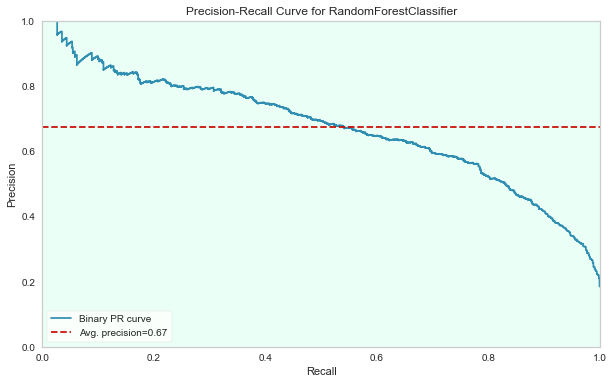

In [1034]:
viz = PrecisionRecallCurve(
      RandomForestClassifier(n_estimators = 200, max_depth = 11, class_weight = "balanced", random_state = 101, n_jobs = -1),
      classes = rf_tf_idf.classes_,
      per_class = True,
      cmap = "Set1")

fig, ax = plt.subplots(figsize = (10, 6))
ax.set_facecolor('#eafff5')

viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [1035]:
RF_TFIDF_AP = viz.score_
RF_TFIDF_AP

0.673726951914478

## Ada Boosting

### CountVectorizer

In [1036]:
from sklearn.ensemble import AdaBoostClassifier

ada_count = AdaBoostClassifier(n_estimators = 500, random_state = 101)
ada_count.fit(X_train_count, y_train)

AdaBoostClassifier(n_estimators=500, random_state=101)

Ada_Count Model
---------------
[[3497  212]
 [ 342  478]]
Test_Set
              precision    recall  f1-score   support

           0       0.91      0.94      0.93      3709
           1       0.69      0.58      0.63       820

    accuracy                           0.88      4529
   macro avg       0.80      0.76      0.78      4529
weighted avg       0.87      0.88      0.87      4529

Train_Set
              precision    recall  f1-score   support

           0       0.93      0.96      0.94     14831
           1       0.80      0.66      0.72      3281

    accuracy                           0.91     18112
   macro avg       0.86      0.81      0.83     18112
weighted avg       0.90      0.91      0.90     18112



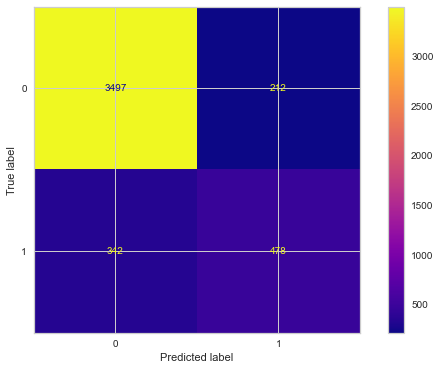

In [1037]:
print("Ada_Count Model")
print("---------------")
eval(ada_count, X_train_count, X_test_count)

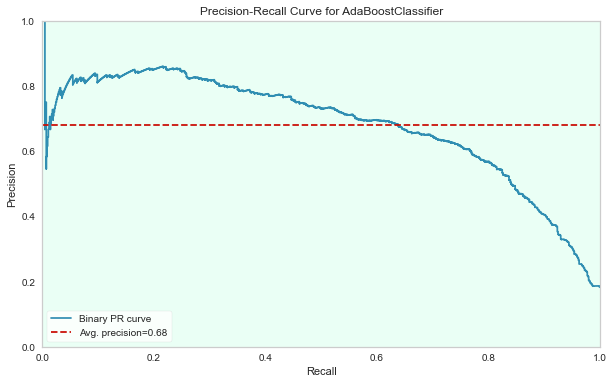

In [1038]:
viz = PrecisionRecallCurve(
      AdaBoostClassifier(n_estimators = 500, random_state = 101),
      classes = ada_count.classes_,
      per_class = True,
      cmap = "Set1")

fig, ax = plt.subplots(figsize = (10, 6))
ax.set_facecolor('#eafff5')

viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [1039]:
y_pred = ada_count.predict(X_test_count)
ada_count_rec = recall_score(y_test, y_pred, pos_label = 0, average = None)
ada_count_f1 = f1_score(y_test, y_pred, pos_label = 0, average = None)
ada_count_AP = viz.score_

In [1040]:
print("viz.score_    : ", viz.score_)
print("Ada_Count_rec : ", ada_count_rec)
print("Ada_Count_f1  : ", ada_count_f1)
print("Ada_Count_AP  : ", ada_count_AP)

viz.score_    :  0.679278253579584
Ada_Count_rec :  [0.94284174 0.58292683]
Ada_Count_f1  :  [0.92660307 0.63311258]
Ada_Count_AP  :  0.679278253579584


### CountVectorizer with Cross Validation

In [1041]:
custom_scorer = {'accuracy': make_scorer(accuracy_score),
                 'precision-0': make_scorer(precision_score, pos_label = 0),
                 'recall-0': make_scorer(recall_score, pos_label = 0),
                 'f1-0': make_scorer(f1_score, pos_label = 0),
                 'precision-1': make_scorer(precision_score, pos_label = 1),
                 'recall-1': make_scorer(recall_score, pos_label = 1),
                 'f1-1': make_scorer(f1_score, pos_label = 1)
                 }

for i, j in custom_scorer.items():
    model = AdaBoostClassifier(n_estimators = 500, random_state = 101)
    scores = cross_val_score(model, X_train_count, y_train, cv = 10, scoring = j).mean()
    if i == "recall-1":
        ada_count_rec = scores
    elif i == "f1-1":
        ada_count_f1 = scores
    print(f" {i:20} score for Ada_Count : {scores}\n")

 accuracy             score for Ada_Count : 0.8772088463559093

 precision-0          score for Ada_Count : 0.9081366351001658

 recall-0             score for Ada_Count : 0.9457220920658751

 f1-0                 score for Ada_Count : 0.9265375208662826

 precision-1          score for Ada_Count : 0.6987749178526445

 recall-1             score for Ada_Count : 0.5675161242493884

 f1-1                 score for Ada_Count : 0.6260964263124776



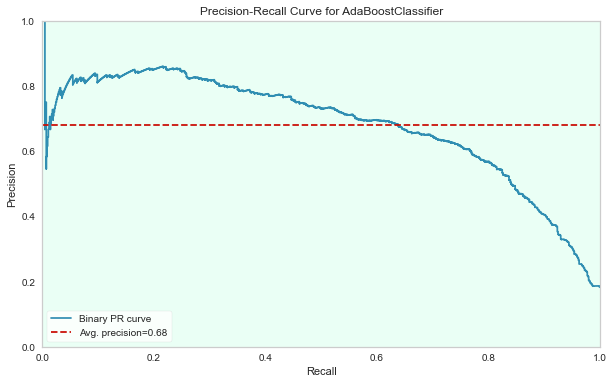

In [1042]:
viz = PrecisionRecallCurve(
      AdaBoostClassifier(n_estimators = 500, random_state = 101),
      classes = ada_count.classes_,
      per_class = True,
      cmap = "Set1")

fig, ax = plt.subplots(figsize = (10, 6))
ax.set_facecolor('#eafff5')

viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [1043]:
Ada_Count_AP = viz.score_
Ada_Count_AP

0.679278253579584

### TF-IDF

In [1044]:
ada_tf_idf = AdaBoostClassifier(n_estimators = 500, random_state = 101)
ada_tf_idf.fit(X_train_tf_idf, y_train)

AdaBoostClassifier(n_estimators=500, random_state=101)

Ada_TFIDF Model
---------------
[[3487  222]
 [ 360  460]]
Test_Set
              precision    recall  f1-score   support

           0       0.91      0.94      0.92      3709
           1       0.67      0.56      0.61       820

    accuracy                           0.87      4529
   macro avg       0.79      0.75      0.77      4529
weighted avg       0.86      0.87      0.87      4529

Train_Set
              precision    recall  f1-score   support

           0       0.94      0.97      0.95     14831
           1       0.82      0.71      0.76      3281

    accuracy                           0.92     18112
   macro avg       0.88      0.84      0.86     18112
weighted avg       0.92      0.92      0.92     18112



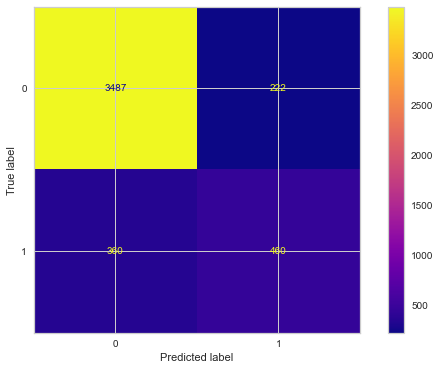

In [1045]:
print("Ada_TFIDF Model")
print("---------------")
eval(ada_tf_idf, X_train_tf_idf, X_test_tf_idf)

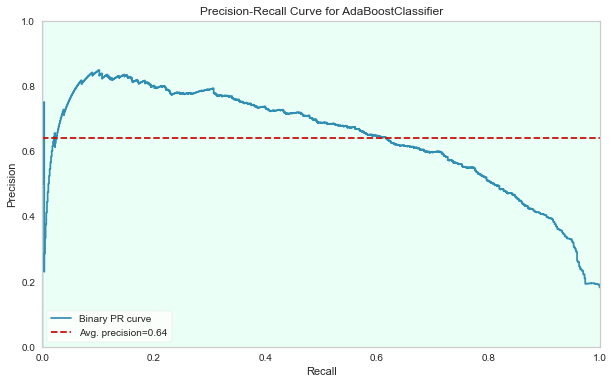

In [1046]:
viz = PrecisionRecallCurve(
      AdaBoostClassifier(n_estimators = 500, random_state = 101),
      classes = ada_tf_idf.classes_,
      per_class = True,
      cmap = "Set1")

fig, ax = plt.subplots(figsize = (10, 6))
ax.set_facecolor('#eafff5')

viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [1047]:
y_pred = ada_tf_idf.predict(X_test_tf_idf)
ada_tf_idf_rec = recall_score(y_test, y_pred, pos_label = 0, average = None)
ada_tf_idf_f1 = f1_score(y_test, y_pred, pos_label = 0, average = None)
ada_tf_idf_AP = viz.score_

In [1048]:
print("viz.score_    : ", viz.score_)
print("Ada_TFIDF_rec : ", ada_tf_idf_rec)
print("Ada_TFIDF_f1  : ", ada_tf_idf_f1)
print("Ada_TFIDF_AP  : ", ada_tf_idf_AP)

viz.score_    :  0.6396855970775207
Ada_TFIDF_rec :  [0.94014559 0.56097561]
Ada_TFIDF_f1  :  [0.92297512 0.61251664]
Ada_TFIDF_AP  :  0.6396855970775207


### TF-IDF with Cross Validation

In [1049]:
custom_scorer = {'accuracy': make_scorer(accuracy_score),
                 'precision-0': make_scorer(precision_score, pos_label = 0),
                 'recall-0': make_scorer(recall_score, pos_label = 0),
                 'f1-0': make_scorer(f1_score, pos_label = 0),
                 'precision-1': make_scorer(precision_score, pos_label = 1),
                 'recall-1': make_scorer(recall_score, pos_label = 1),
                 'f1-1': make_scorer(f1_score, pos_label = 1)
                 }

for i, j in custom_scorer.items():
    model = AdaBoostClassifier(n_estimators = 500, random_state = 101)
    scores = cross_val_score(model, X_train_tf_idf, y_train, cv = 10, scoring = j).mean()
    if i == "recall-1":
        ada_tfidf_rec = scores
    elif i == "f1-1":
        ada_tfidf_f1 = scores
    print(f" {i:20} score for Ada_TFIDF : {scores}\n")

 accuracy             score for Ada_TFIDF : 0.8727921287983783

 precision-0          score for Ada_TFIDF : 0.9056159277779148

 recall-0             score for Ada_TFIDF : 0.942957880234754

 f1-0                 score for Ada_TFIDF : 0.9238906365495574

 precision-1          score for Ada_TFIDF : 0.6837405559521853

 recall-1             score for Ada_TFIDF : 0.5556305137519459

 f1-1                 score for Ada_TFIDF : 0.6126439799671839



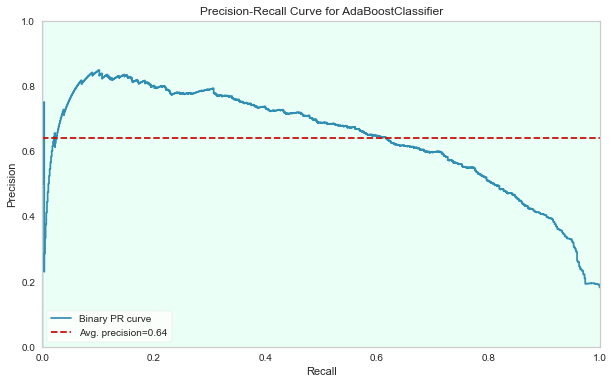

In [1050]:
viz = PrecisionRecallCurve(
      AdaBoostClassifier(n_estimators = 500, random_state = 101),
      classes = ada_tf_idf.classes_,
      per_class = True,
      cmap = "Set1")

fig, ax = plt.subplots(figsize = (10, 6))
ax.set_facecolor('#eafff5')

viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [1051]:
Ada_TFIDF_AP = viz.score_
Ada_TFIDF_AP

0.6396855970775207

## Modelling with Deep Learning

In [1052]:
df_dl = pd.read_csv("Womens Clothing E-Commerce Reviews.csv")
df_dl.head()

Unnamed: 0  Clothing ID  Age                    Title  \
0           0          767   33                      NaN   
1           1         1080   34                      NaN   
2           2         1077   60  Some major design flaws   
3           3         1049   50         My favorite buy!   
4           4          847   47         Flattering shirt   

                                                                                                                                                                                               Review Text  \
0                                                                                                                                                    Absolutely wonderful - silky and sexy and comfortable   
1  Love this dress!  it's sooo pretty.  i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite.  i bought a petite and am 5'8".  i love the length...   
2  I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i co...   
3                                                                             I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!   
4         This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!   

   Rating  Recommended IND  Positive Feedback Count   Division Name  \
0       4                1                        0       Initmates   
1       5                1                        4         General   
2       3                0                        0         General   
3       5                1                        0  General Petite   
4       5                1                        6         General   

  Department Name Class Name  
0        Intimate  Intimates  
1         Dresses    Dresses  
2         Dresses    Dresses  
3         Bottoms      Pants  
4            Tops    Blouses

In [1053]:
df_dl = df_dl[["Review Text","Recommended IND"]]
df_dl.head()

Review Text  \
0                                                                                                                                                    Absolutely wonderful - silky and sexy and comfortable   
1  Love this dress!  it's sooo pretty.  i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite.  i bought a petite and am 5'8".  i love the length...   
2  I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i co...   
3                                                                             I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!   
4         This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!   

   Recommended IND  
0                1  
1                1  
2                0  
3                1  
4                1

In [1054]:
df_dl.rename(columns = {'Review Text':'text', 'Recommended IND':'recommend'}, inplace = True)

In [1055]:
df_dl.shape

(23486, 2)

In [1056]:
df_dl.isnull().sum()

text         845
recommend      0
dtype: int64

In [1057]:
df_dl = df_dl.dropna(subset = ['text'], axis = 0)
df_dl = df_dl.reset_index(drop = True)

In [1058]:
df_dl.isnull().sum()

text         0
recommend    0
dtype: int64

In [1059]:
df_dl.shape

(22641, 2)

In [1060]:
df_dl.head()

text  \
0                                                                                                                                                    Absolutely wonderful - silky and sexy and comfortable   
1  Love this dress!  it's sooo pretty.  i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite.  i bought a petite and am 5'8".  i love the length...   
2  I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i co...   
3                                                                             I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!   
4         This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!   

   recommend  
0          1  
1          1  
2          0  
3          1  
4          1

In [1061]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, Embedding, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping

### Tokenization

In [1063]:
X = df_dl['text'].values
y = df_dl['recommend'].map({0:1, 1:0}).values

In [1064]:
num_words = 10000
tokenizer = Tokenizer(num_words = num_words)

In [1065]:
tokenizer.fit_on_texts(X)

### Creating word index

In [1066]:
tokenizer.word_index

{'the': 1,
 'i': 2,
 'and': 3,
 'a': 4,
 'it': 5,
 'is': 6,
 'this': 7,
 'to': 8,
 'in': 9,
 'but': 10,
 'on': 11,
 'for': 12,
 'of': 13,
 'with': 14,
 'was': 15,
 'so': 16,
 'my': 17,
 'dress': 18,
 'not': 19,
 'that': 20,
 'love': 21,
 'size': 22,
 'very': 23,
 'have': 24,
 'top': 25,
 'fit': 26,
 'are': 27,
 'like': 28,
 'be': 29,
 'as': 30,
 'me': 31,
 'wear': 32,
 "it's": 33,
 'great': 34,
 'too': 35,
 "i'm": 36,
 'or': 37,
 'am': 38,
 'just': 39,
 'you': 40,
 'would': 41,
 'they': 42,
 'up': 43,
 'at': 44,
 'fabric': 45,
 'small': 46,
 'color': 47,
 'look': 48,
 'if': 49,
 'more': 50,
 'really': 51,
 'ordered': 52,
 'little': 53,
 'perfect': 54,
 'will': 55,
 'one': 56,
 'these': 57,
 'flattering': 58,
 'well': 59,
 'an': 60,
 'soft': 61,
 'out': 62,
 'back': 63,
 'because': 64,
 'had': 65,
 'can': 66,
 '\r': 67,
 'comfortable': 68,
 'cute': 69,
 'nice': 70,
 'than': 71,
 'bought': 72,
 'beautiful': 73,
 'when': 74,
 'all': 75,
 'looks': 76,
 'bit': 77,
 'fits': 78,
 'large': 79,

In [1067]:
len(tokenizer.word_index)

14847

In [1068]:
len(tokenizer.word_index.keys())

14847

### Converting tokens to numeric

In [1069]:
X_num_tokens = tokenizer.texts_to_sequences(X)

In [1070]:
num_tokens = [len(tokens) for tokens in X_num_tokens]
num_tokens = np.array(num_tokens)

In [1071]:
X_num_tokens

[[253, 532, 917, 3, 662, 3, 68],
 [21,
  7,
  18,
  33,
  1713,
  99,
  2,
  1322,
  8,
  221,
  5,
  9,
  4,
  106,
  3,
  36,
  314,
  2,
  131,
  1243,
  2,
  429,
  41,
  24,
  52,
  5,
  136,
  1243,
  33,
  95,
  2,
  72,
  4,
  95,
  3,
  38,
  501,
  2,
  21,
  1,
  86,
  11,
  31,
  416,
  39,
  4,
  53,
  454,
  1,
  392,
  41,
  155,
  29,
  4,
  130,
  1372,
  11,
  438,
  439,
  6,
  772,
  95],
 [2,
  65,
  312,
  178,
  1095,
  12,
  7,
  18,
  3,
  51,
  195,
  5,
  8,
  102,
  12,
  31,
  2,
  1152,
  52,
  1,
  95,
  46,
  17,
  236,
  22,
  10,
  2,
  219,
  7,
  8,
  29,
  6689,
  46,
  16,
  46,
  9,
  661,
  20,
  2,
  118,
  19,
  784,
  5,
  43,
  2,
  2147,
  5,
  9,
  95,
  97,
  82,
  15,
  39,
  637,
  250,
  1,
  25,
  656,
  15,
  68,
  3,
  26,
  258,
  10,
  1,
  175,
  656,
  65,
  4,
  23,
  148,
  272,
  475,
  3,
  527,
  718,
  489,
  4601,
  151,
  975,
  1876,
  4,
  1877,
  142,
  1589,
  15,
  1,
  4601,
  151,
  475,
  830,
  3247,
  313,
  1,


### Maximum number of tokens for all documents¶

In [1072]:
num_tokens.max()

116

In [1073]:
num_tokens.mean()

60.39287133960514

In [1074]:
num_tokens.argmax()

16263

In [1075]:
X[16263]

"I love maeve tops. i love the material and feel of this brand. when i saw the new tops that came out i ran to my local store to try one on. i'm usually a large in a top, once in a while an xl. they only had a large to try so i tried it in the black motif.\ni could barely get the top on. it looked like i was missing 1/2 of the top. i doubled checked the size and it was a large.\nit's a shame, the top is really cute. if you are the least bit broad or busty, go up a size or two. if you are usually a"

In [1076]:
num_tokens.argmin()

820

In [1077]:
X[820]

'Great style!'

### Fixing token counts of all documents (pad_sequences)

In [1078]:
max_tokens = 103

In [1079]:
sum(num_tokens < max_tokens) / len(num_tokens)

0.9604699439070712

In [1080]:
X_pad = pad_sequences(X_num_tokens, maxlen = max_tokens)

In [1081]:
X_pad.shape

(22641, 103)

### Train Set Split

In [1082]:
from sklearn.model_selection import train_test_split
from keras.layers import Bidirectional

In [1083]:
X_train, X_test, y_train, y_test = train_test_split(X_pad, y, test_size = 0.2, stratify = y, random_state = 101)

### Modeling

In [1084]:
model = Sequential()

In [1085]:
embedding_size = 100

In [1086]:
model.add(Embedding(input_dim = num_words,
                    output_dim = embedding_size,
                    input_length = max_tokens,
                    name = 'embedding_layer'))

In [1087]:
model.add(Bidirectional(GRU(units = 48, return_sequences = True)))
model.add(Dropout(0.5))
model.add(Bidirectional(GRU(units = 24, return_sequences = True)))
model.add(Dropout(0.5))
model.add(Bidirectional(GRU(units = 12)))
model.add(Dense(1, activation = 'sigmoid'))

In [1088]:
optimizer = Adam(lr = 0.004)

In [1089]:
model.compile(loss = 'binary_crossentropy',
              optimizer = optimizer,
              metrics = ["Recall"])

In [1090]:
model.summary() 

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_layer (Embedding)  (None, 103, 100)          1000000   
_________________________________________________________________
bidirectional_4 (Bidirection (None, 103, 96)           43200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 103, 96)           0         
_________________________________________________________________
bidirectional_5 (Bidirection (None, 103, 48)           17568     
_________________________________________________________________
dropout_3 (Dropout)          (None, 103, 48)           0         
_________________________________________________________________
bidirectional_6 (Bidirection (None, 24)                4464      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                

In [1091]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "auto", 
                           verbose = 1, patience = 5, restore_best_weights = True)

In [1092]:
pd.Series(y_train).value_counts(normalize = True) 

0   0.819
1   0.181
dtype: float64

In [1093]:
weights = {0:19, 1:81}

In [1094]:
model.fit(X_train, y_train, epochs = 25, batch_size = 256, class_weight = weights,
         validation_data = (X_test, y_test), callbacks = [early_stop])

Epoch 1/25
71/71 [==============================] - 122s 2s/step - loss: 15.8439 - recall: 0.7519 - val_loss: 0.4935 - val_recall: 0.9000
Epoch 2/25
71/71 [==============================] - 109s 2s/step - loss: 9.3860 - recall: 0.8976 - val_loss: 0.3121 - val_recall: 0.8000
Epoch 3/25
71/71 [==============================] - 110s 2s/step - loss: 6.7863 - recall: 0.9363 - val_loss: 0.3441 - val_recall: 0.8037
Epoch 4/25
71/71 [==============================] - 107s 2s/step - loss: 5.1040 - recall: 0.9589 - val_loss: 0.4056 - val_recall: 0.8317
Epoch 5/25
71/71 [==============================] - 108s 2s/step - loss: 4.2318 - recall: 0.9686 - val_loss: 0.4451 - val_recall: 0.8317
Epoch 6/25
71/71 [==============================] - 107s 2s/step - loss: 3.3544 - recall: 0.9811 - val_loss: 0.4348 - val_recall: 0.7683
Epoch 7/25
71/71 [==============================] - 1806s 2s/step - loss: 2.7545 - recall: 0.9835 - val_loss: 0.4258 - val_recall: 0.6744
Restoring model weights from the end of

### Model evaluation

In [1095]:
model_loss = pd.DataFrame(model.history.history)
model_loss.head()

loss  recall  val_loss  val_recall
0 15.844   0.752     0.493       0.900
1  9.386   0.898     0.312       0.800
2  6.786   0.936     0.344       0.804
3  5.104   0.959     0.406       0.832
4  4.232   0.969     0.445       0.832

<AxesSubplot:>

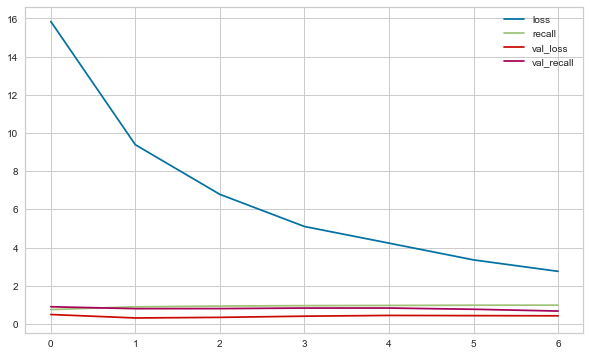

In [1096]:
model_loss.plot()

In [1097]:
model.evaluate(X_train, y_train)

566/566 [==============================] - 34s 57ms/step - loss: 0.2020 - recall: 0.9372


[0.2020207643508911, 0.9372142553329468]

In [1098]:
model.evaluate(X_test, y_test) 

142/142 [==============================] - 8s 56ms/step - loss: 0.3121 - recall: 0.8000


[0.3120758533477783, 0.800000011920929]

In [1099]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, roc_auc_score

y_train_pred = (model.predict(X_train) >= 0.5).astype("int32")

print(confusion_matrix(y_train, y_train_pred))
print("---------------------------------------------")
print(classification_report(y_train, y_train_pred))

[[13674  1157]
 [  206  3075]]
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      0.92      0.95     14831
           1       0.73      0.94      0.82      3281

    accuracy                           0.92     18112
   macro avg       0.86      0.93      0.89     18112
weighted avg       0.94      0.92      0.93     18112



In [1100]:
y_pred = (model.predict(X_test) >= 0.5).astype("int32")

print(confusion_matrix(y_test, y_pred))
print("--------------------------------------")
print(classification_report(y_test, y_pred))

[[3303  406]
 [ 164  656]]
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.95      0.89      0.92      3709
           1       0.62      0.80      0.70       820

    accuracy                           0.87      4529
   macro avg       0.79      0.85      0.81      4529
weighted avg       0.89      0.87      0.88      4529



In [1101]:
from sklearn.metrics import precision_recall_curve, average_precision_score

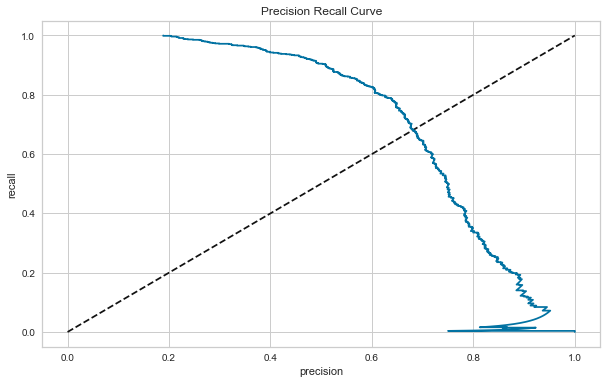

In [1102]:
y_pred_proba = model.predict(X_test)
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(precision, recall)
plt.xlabel('precision')
plt.ylabel('recall')
plt.title('Precision Recall Curve')
plt.show()

In [1103]:
DL_AP = average_precision_score(y_test, y_pred_proba)
DL_f1 = f1_score(y_test, y_pred)
DL_rec = recall_score(y_test, y_pred)

In [1104]:
print("DL_AP   : ", DL_AP)
print("DL_f1   : ", DL_f1)
print("DL_rec  : ", DL_rec)

DL_AP   :  0.7241043381895954
DL_f1   :  0.6971307120085016
DL_rec  :  0.8


### Compare Models F1 Scores, Recall Scores and Average Precision Score

In [1109]:
compare = pd.DataFrame({"Model": ["NaiveBayes(Multi)_Count", "NaiveBayes(Berno)_Count", "LogReg_Count", "SVM_Count", 
                                  "Random Forest_Count", "AdaBoost_Count", "NaiveBayes(Multi)_TFIDF", 
                                  "NaiveBayes(Berno)_TFIDF", "LogReg_TFIDF", "SVM_TFIDF", "Random Forest_TFIDF", 
                                  "AdaBoost_TFIDF", "DL"],
                        
                        "F1_Score": [nbm_count_f1, nbb_count_f1, log_count_f1, svc_count_f1, rf_count_f1, ada_count_f1,
                                    nbm_tfidf_f1, nbb_tfidf_f1, log_tfidf_f1, svc_tfidf_f1, rf_tfidf_f1, ada_tfidf_f1, DL_f1],
                                                 
                        "Recall_Score": [nbm_count_rec, nbb_count_rec, log_count_rec, svc_count_rec, rf_count_rec, 
                                         ada_count_rec, nbm_tfidf_rec, nbb_tfidf_rec, log_tfidf_rec, svc_tfidf_rec, 
                                         rf_tfidf_rec, ada_tfidf_rec, DL_rec],
                        
                        "Average_Precision_Score": [NBMulti_Count_AP, NBBerno_Count_AP, LogReg_Count_AP, SVC_Count_AP, 
                                                    RF_Count_AP, Ada_Count_AP, NBMulti_TFIDF_AP, NBBerno_TFIDF_AP,
                                                    LogReg_TFIDF_AP, SVC_TFIDF_AP, RF_TFIDF_AP, Ada_TFIDF_AP, DL_AP]})
  
    
compare = compare.sort_values(by="Recall_Score", ascending=True)
fig = px.bar(compare, x = "Recall_Score", y = "Model", title = "Recall_Score")
fig.show()

compare = compare.sort_values(by="F1_Score", ascending=True)
fig = px.bar(compare, x = "F1_Score", y = "Model", title = "F1_Score")
fig.show()

compare = compare.sort_values(by="Average_Precision_Score", ascending=True)
fig = px.bar(compare, x = "Average_Precision_Score", y = "Model", title = "Average_Precision_Score")
fig.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Prediction

In [1186]:
review1 = "I ordered this dress in 0p since i am 5ft. it fits great its not too short just above the knee."
review2 = "Love the top design, not so much the fabric. i should've read the top was 100% polyester. returning and finding a better quality top."
review3 = "Love this henely, the lace-up is cute. the shirt is comfy. so versatile. beach coverup or over jeans"
review4 = "Loved this dress online, but my small pettie stature made me looks like an orphan from the prairie."
review5 = "I tried it in the store but was not the true size so i ordered online. i wore it only once so far and got lots of compliments. very unique design."
review6 = "Nice shirt seems well made. good just not a great fit for me."
review7 = "I tried on this dress in store and was amazed by the quality and simple structure of the dress. bought it with no hesitation."
review8 = "This top has a bit of a retro flare but so adorable on. looks really cute with a pair of faded boot cut jeans."
review9 = "Great quality top. i do wish it fit me...i'm really long waisted and this top was too short. had to return"
review10 = "A serious joke. i struggled with the buttons for a good 10 minutes and gave up after the 3rd button. i'm not sure what they were thinking."

reviews = [review1, review2, review3, review4, review5, review6, review7, review8, review9, review10]

In [1187]:
tokens = tokenizer.texts_to_sequences(reviews) 

In [1188]:
tokens_pad = pad_sequences(tokens, maxlen = max_tokens)
tokens_pad.shape

(10, 103)

In [1189]:
mod_pred = model.predict(tokens_pad)

In [1190]:
mod_pred

array([[0.05352652],
       [0.9448859 ],
       [0.03099984],
       [0.7357794 ],
       [0.05573779],
       [0.28621277],
       [0.27906436],
       [0.03104538],
       [0.9307357 ],
       [0.8429065 ]], dtype=float32)

In [1191]:
df_pred = pd.DataFrame(mod_pred, index = reviews)
df_pred.rename(columns = {0:'Pred_Proba'}, inplace = True)

In [1192]:
df_pred["Predicted_Feedbaack"] = df_pred["Pred_Proba"].apply(lambda x: "Not Recommended" if x >= 0.5 else "Recommended")

In [1193]:
df_pred

Pred_Proba  \
I ordered this dress in 0p since i am 5ft. it fits great its not too short just above the knee.                                                          0.054   
Love the top design, not so much the fabric. i should've read the top was 100% polyester. returning and finding a better quality top.                    0.945   
Love this henely, the lace-up is cute. the shirt is comfy. so versatile. beach coverup or over jeans                                                     0.031   
Loved this dress online, but my small pettie stature made me looks like an orphan from the prairie.                                                      0.736   
I tried it in the store but was not the true size so i ordered online. i wore it only once so far and got lots of compliments. very unique design.       0.056   
Nice shirt seems well made. good just not a great fit for me.                                                                                            0.286   
I tried on this dress in store and was amazed by the quality and simple structure of the dress. bought it with no hesitation.                            0.279   
This top has a bit of a retro flare but so adorable on. looks really cute with a pair of faded boot cut jeans.                                           0.031   
Great quality top. i do wish it fit me...i'm really long waisted and this top was too short. had to return                                               0.931   
A serious joke. i struggled with the buttons for a good 10 minutes and gave up after the 3rd button. i'm not sure what they were thinking.               0.843   

                                                                                                                                                   Predicted_Feedbaack  
I ordered this dress in 0p since i am 5ft. it fits great its not too short just above the knee.                                                            Recommended  
Love the top design, not so much the fabric. i should've read the top was 100% polyester. returning and finding a better quality top.                  Not Recommended  
Love this henely, the lace-up is cute. the shirt is comfy. so versatile. beach coverup or over jeans                                                       Recommended  
Loved this dress online, but my small pettie stature made me looks like an orphan from the prairie.                                                    Not Recommended  
I tried it in the store but was not the true size so i ordered online. i wore it only once so far and got lots of compliments. very unique design.         Recommended  
Nice shirt seems well made. good just not a great fit for me.                                                                                              Recommended  
I tried on this dress in store and was amazed by the quality and simple structure of the dress. bought it with no hesitation.                              Recommended  
This top has a bit of a retro flare but so adorable on. looks really cute with a pair of faded boot cut jeans.                                             Recommended  
Great quality top. i do wish it fit me...i'm really long waisted and this top was too short. had to return                                             Not Recommended  
A serious joke. i struggled with the buttons for a good 10 minutes and gave up after the 3rd button. i'm not sure what they were thinking.             Not Recommended

### Conclusion

- In this project we have used sentiment analysis to determine whether the product is recommended or not. We have built models with five different machine learning algorithms and also with deep learning algorithm and compare their performance. Thus, we have determined the algorithm that makes the most accurate emotion estimation by using the information obtained from the * Review Text * variable.

- When the scores are examined in the Compare section, it is seen that the scores are generally close to each other, but the Logistic Regression model stands out. 

- Thank you in advance for your constructive and instructive comments.